In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'C:\Users\ARNAB\Downloads\baseball.csv')

In [5]:
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


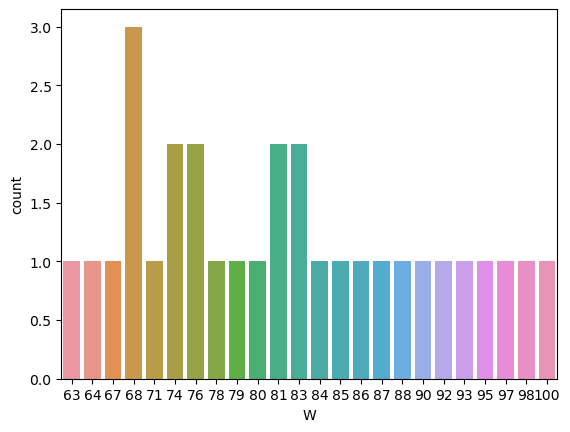

In [11]:
sns.countplot(x='W', data=df);

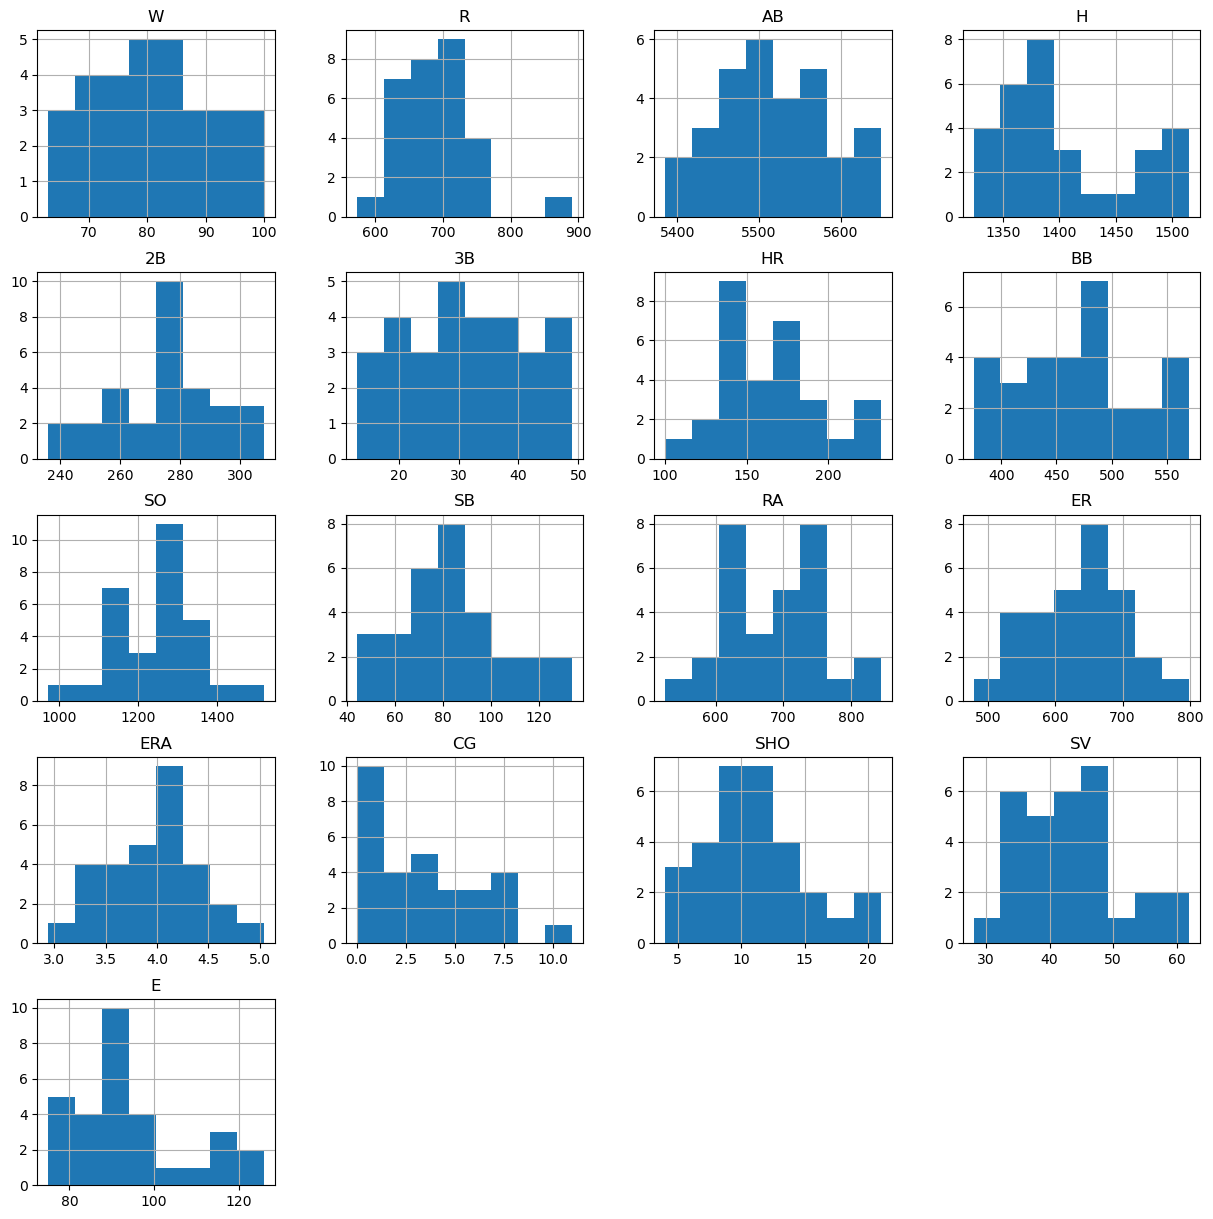

In [12]:
df.hist(bins=8,figsize=(15,15));

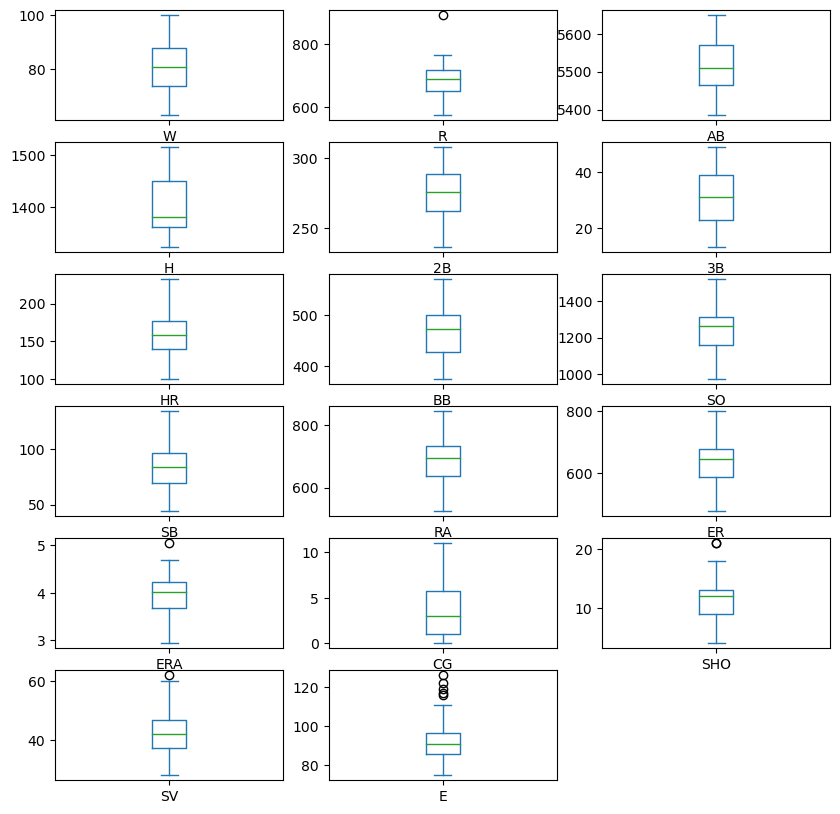

In [13]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(10,10));

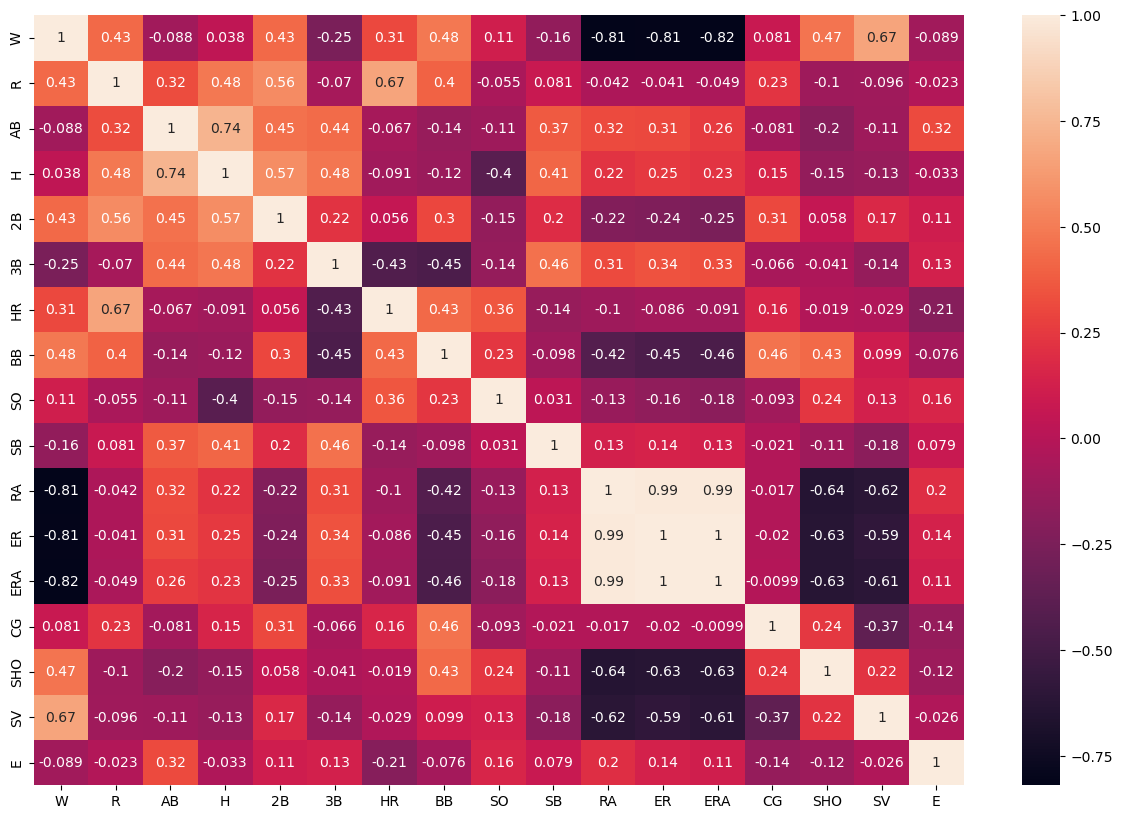

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True);

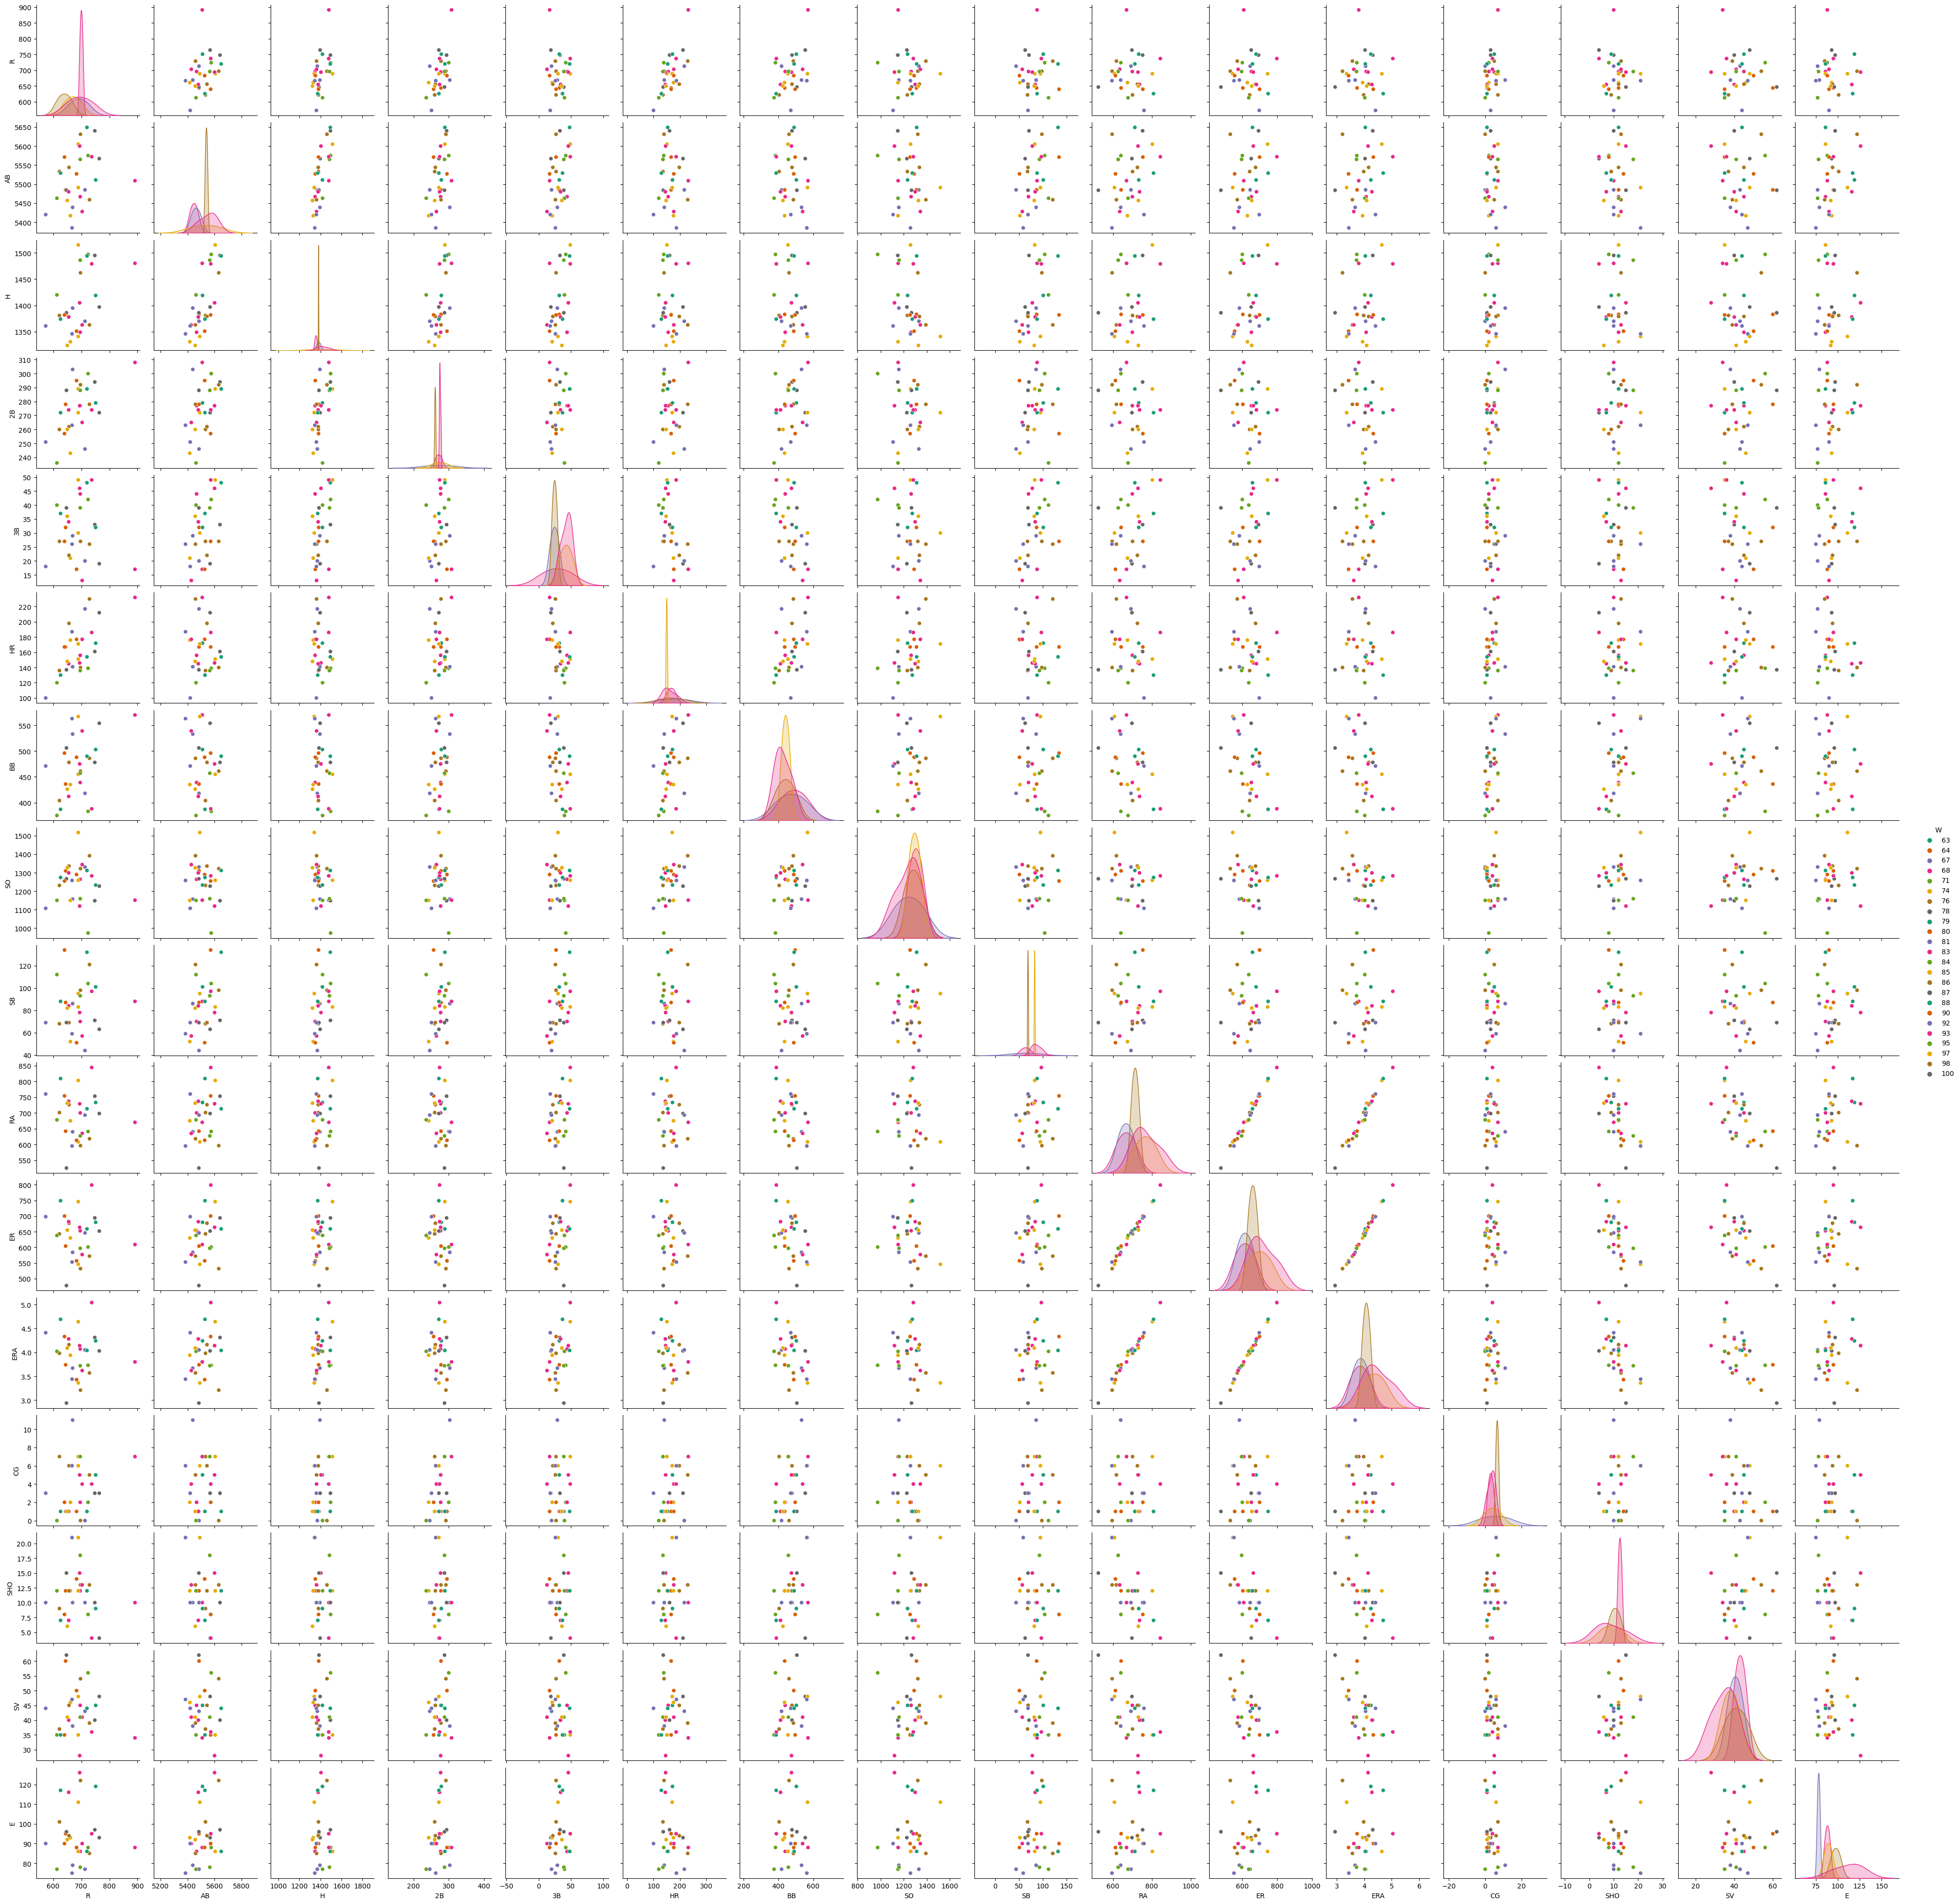

In [15]:
sns.pairplot(df, palette="Dark2", hue='W');

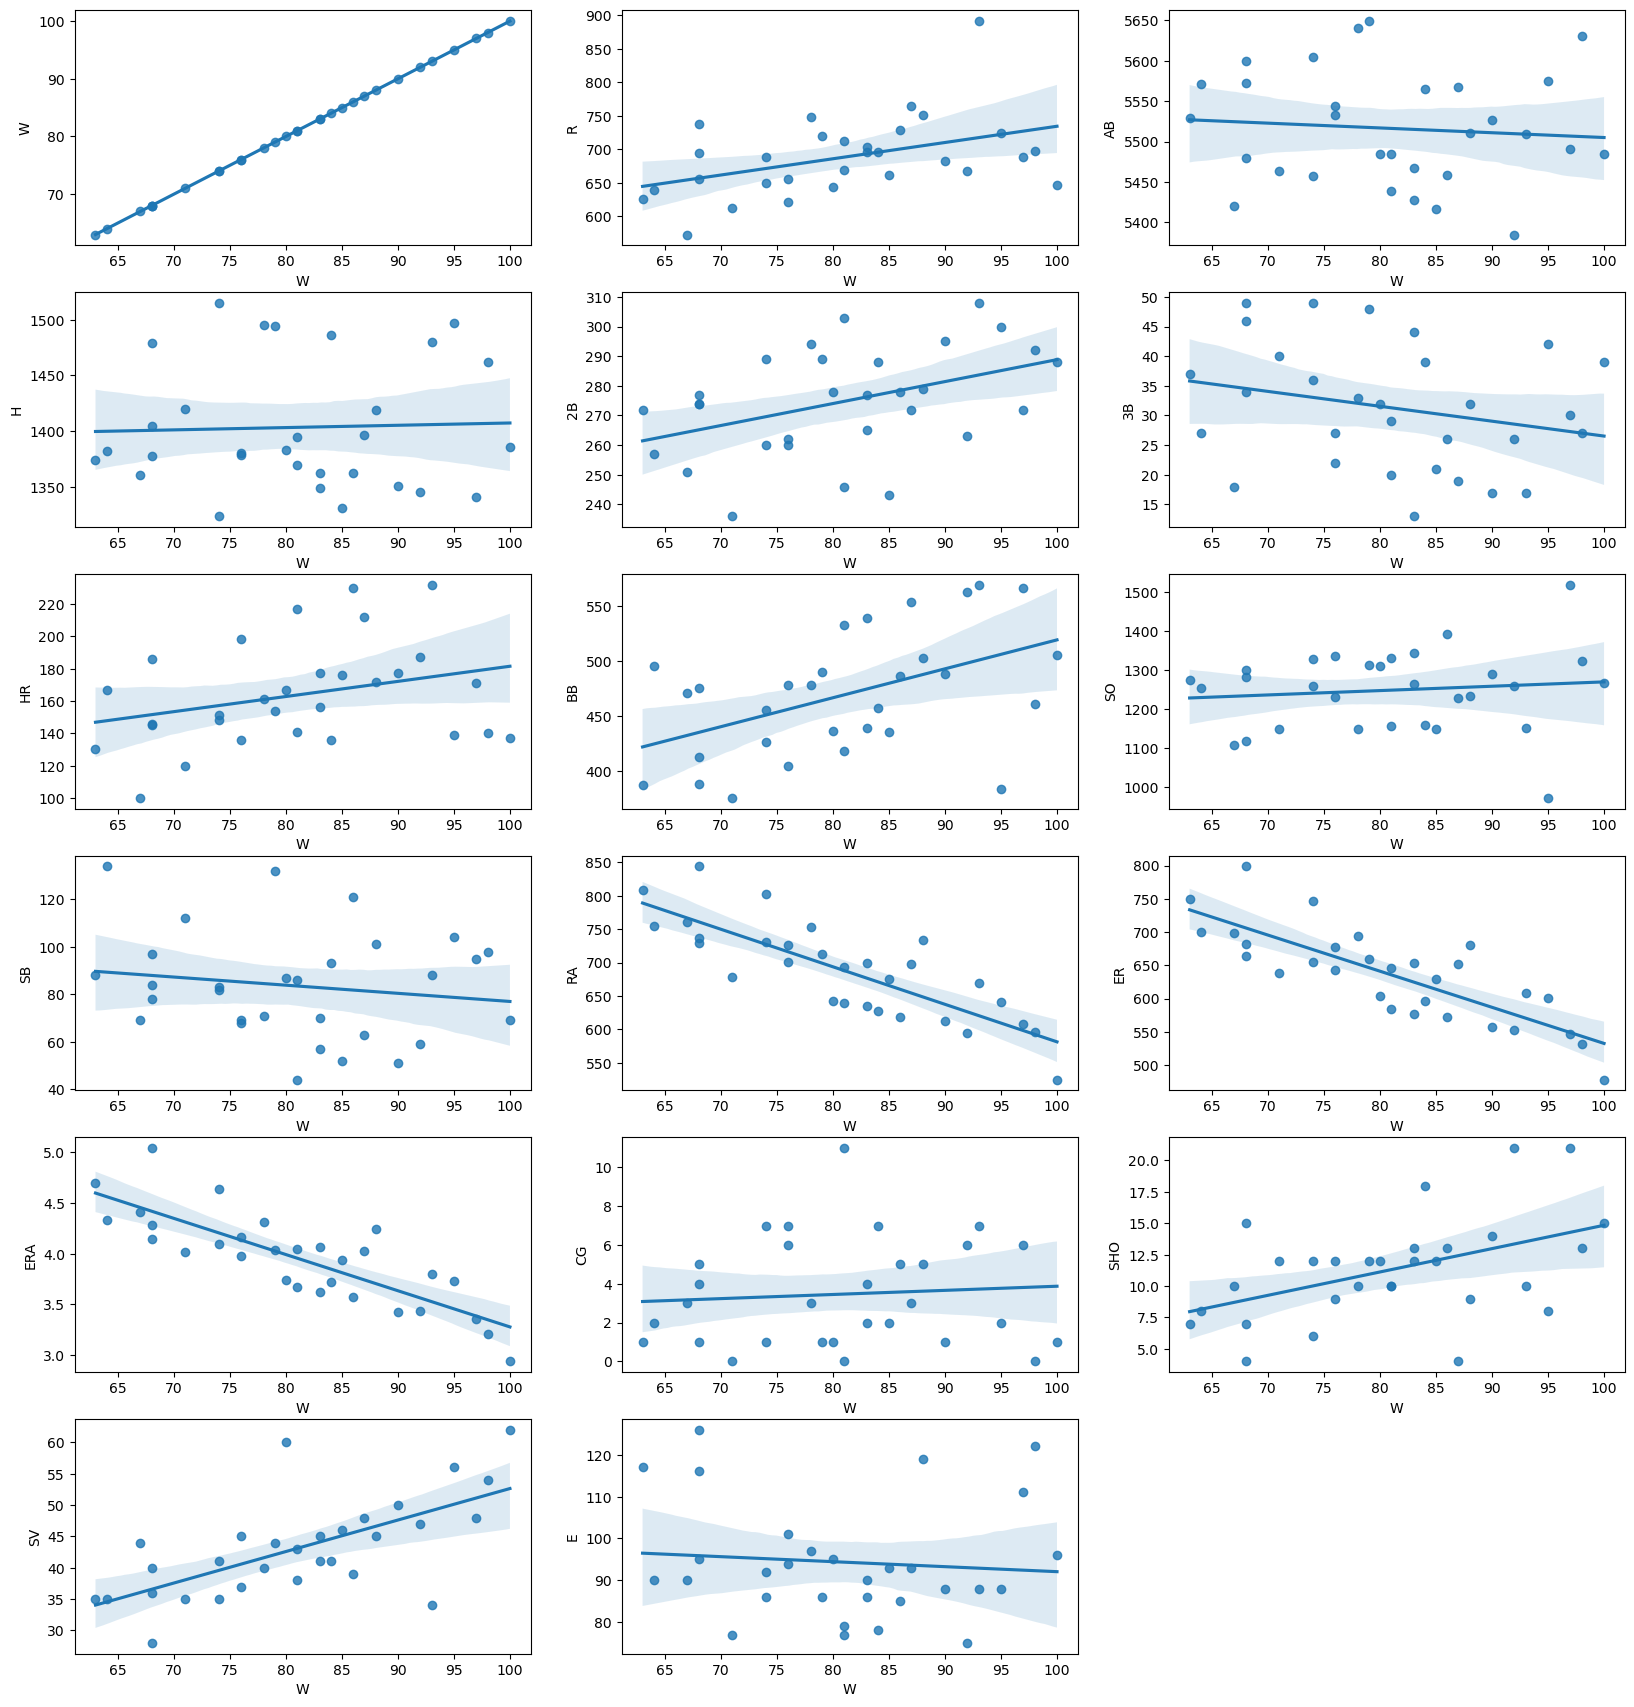

In [16]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=21:
        plt.subplot(7,3,p)
        sns.regplot(x='W', y=i, data=df)
        plt.xlabel('W')
        plt.ylabel(i)
    p+=1
plt.show()

In [17]:
# Checking Skewness

df_skew = df.skew()
df_skew

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [18]:
# Removing Skewness Using Cuberoot

for index, value in df_skew.iteritems():
    if value > 0.5 or value < -0.5:
        df[index] = np.cbrt(df[index])
df.skew()

W      0.047089
R      0.892970
AB     0.183437
H      0.642599
2B    -0.230650
3B     0.129502
HR     0.175310
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -1.043632
SHO   -0.280283
SV     0.325143
E      0.719735
dtype: float64

In [19]:
# Assigning Feature & Target Data

x = df.drop(['W'], axis=1)
y = df[['W']]

In [20]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [21]:
# Checking Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values Features
0     11.297329        R
1     12.275089       AB
2      8.687661        H
3      4.135957       2B
4      3.000257       3B
5     10.680357       HR
6      3.760073       BB
7      2.766059       SO
8      1.909031       SB
9    194.716847       RA
10  1802.045785       ER
11  1287.792430      ERA
12     2.705717       CG
13     3.122842      SHO
14     4.446570       SV
15     2.080859        E

In [22]:
x = x.drop(['ERA'], axis=1)

In [23]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values Features
0    10.539359        R
1     4.190335       AB
2     8.365365        H
3     4.064841       2B
4     2.990873       3B
5     9.633282       HR
6     3.732781       BB
7     2.756326       SO
8     1.741301       SB
9   170.239204       RA
10  171.315583       ER
11    2.630729       CG
12    2.911872      SHO
13    2.787382       SV
14    2.073039        E

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

In [26]:
from sklearn.linear_model import Ridge
r_clf = Ridge(random_state = 39)

In [27]:
r_clf.fit(xtrain,ytrain)

Ridge(random_state=39)

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_param = {'alpha':[0.0001,0.001,0.01,0.1,1,10], 
              'fit_intercept': [True,False], 
              'copy_X': [True , False], 
              'tol':[0.0001,0.001,0.01,0.1,1,10]}

In [29]:
grid_search = GridSearchCV(estimator=r_clf, param_grid=grid_param, cv=2, verbose=3)

In [30]:
grid_search.fit(xtrain,ytrain)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.0001;, score=0.397 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.0001;, score=-0.978 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.001;, score=0.397 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.001;, score=-0.978 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.01;, score=0.397 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.01;, score=-0.978 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.1;, score=0.397 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.1;, score=-0.978 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=1;, score=0.397 total time=   0.0s
[CV 2/2] END a

GridSearchCV(cv=2, estimator=Ridge(random_state=39),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             verbose=3)

In [31]:
grid_search.best_params_

{'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'tol': 0.0001}

In [32]:
Final_model = Ridge(alpha=10, copy_X=True, fit_intercept=True, tol=0.0001)
Final_model.fit(xtrain, ytrain)

Ridge(alpha=10)

In [33]:
from sklearn.metrics import r2_score

rd_pred= Final_model.predict(xtest)
r2s=r2_score(ytest, rd_pred)
print('r2 score: ', r2s*100)

r2 score:  84.64544451290104


In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

from matplotlib import pyplot

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [40]:
#data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv', index_col=0)
data = pd.read_csv(r"C:\Users\ARNAB\Downloads\avocado.csv.zip")
data.drop("Unnamed: 0", axis=1,inplace=True)
names = ['Date', 'AveragePrice', 'TotalVolume', 'Small', 'Large', 'XLarge', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type', 'Year' ,'Region']
data = data.rename(columns=dict(zip(data.columns, names)))
data.head()

Date  AveragePrice  TotalVolume    Small      Large  XLarge  \
0  2015-12-27          1.33     64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35     54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93    118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08     78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28     51039.60   941.48   43838.39   75.78   

   TotalBags  SmallBags  LargeBags  XLargeBags          Type  Year  Region  
0    8696.87    8603.62      93.25         0.0  conventional  2015  Albany  
1    9505.56    9408.07      97.49         0.0  conventional  2015  Albany  
2    8145.35    8042.21     103.14         0.0  conventional  2015  Albany  
3    5811.16    5677.40     133.76         0.0  conventional  2015  Albany  
4    6183.95    5986.26     197.69         0.0  conventional  2015  Albany

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   TotalVolume   18249 non-null  float64
 3   Small         18249 non-null  float64
 4   Large         18249 non-null  float64
 5   XLarge        18249 non-null  float64
 6   TotalBags     18249 non-null  float64
 7   SmallBags     18249 non-null  float64
 8   LargeBags     18249 non-null  float64
 9   XLargeBags    18249 non-null  float64
 10  Type          18249 non-null  object 
 11  Year          18249 non-null  int64  
 12  Region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [42]:
data.describe(include='all')

Date  AveragePrice   TotalVolume         Small         Large  \
count        18249  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
unique         169           NaN           NaN           NaN           NaN   
top     2015-12-27           NaN           NaN           NaN           NaN   
freq           108           NaN           NaN           NaN           NaN   
mean           NaN      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std            NaN      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min            NaN      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%            NaN      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%            NaN      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%            NaN      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max            NaN      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

              XLarge     TotalBags     SmallBags     LargeBags     XLargeBags  \
count   1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean    2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std     1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%     0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%     1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%     6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max     2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

                Type          Year  Region  
count          18249  18249.000000   18249  
unique             2           NaN      54  
top     conventional           NaN  Albany  
freq            9126           NaN     338  
mean             NaN   2016.147899     NaN  
std              NaN      0.939938     NaN  
min              NaN   2015.000000     NaN  
25%              NaN   2015.000000     NaN  
50%              NaN   2016.000000     NaN  
75%              NaN   2017.000000     NaN  
max              NaN   2018.000000     NaN

In [43]:
data.Type.unique()

array(['conventional', 'organic'], dtype=object)

In [44]:
data.Year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

<Axes: xlabel='AveragePrice', ylabel='Type'>

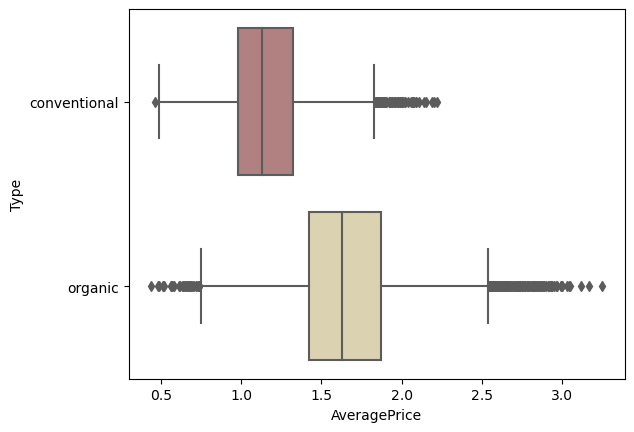

In [45]:
sns.boxplot(y="Type", x="AveragePrice", data=data, palette = 'pink')

In [46]:
label = LabelEncoder()
dicts = {}

label.fit(data.Type.drop_duplicates()) 
dicts['Type'] = list(label.classes_)
data.Type = label.transform(data.Type)

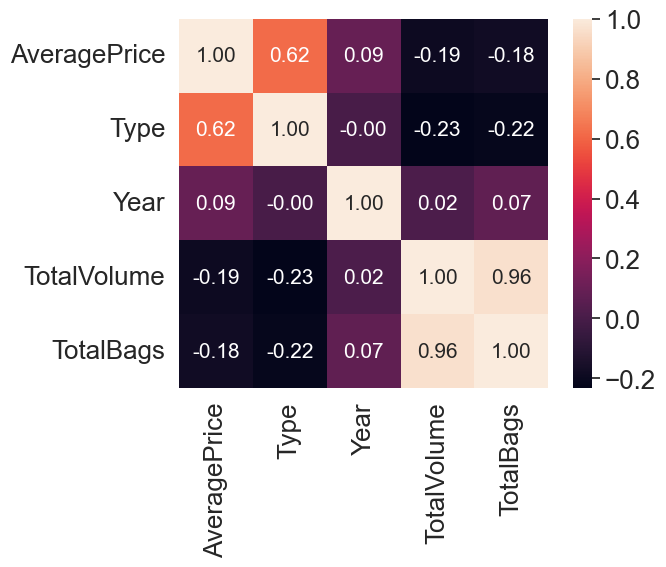

In [47]:
cols = ['AveragePrice','Type','Year','TotalVolume','TotalBags']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

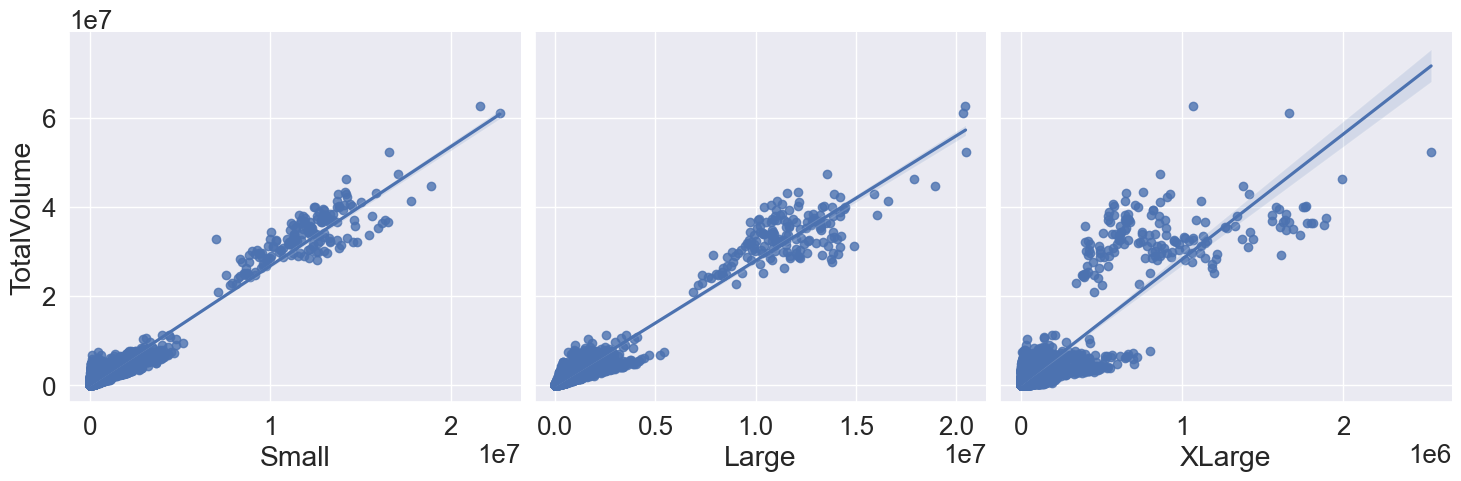

In [48]:
sns.pairplot(data, x_vars=['Small', 'Large', 'XLarge'], y_vars='TotalVolume', size=5, aspect=1, kind='reg')

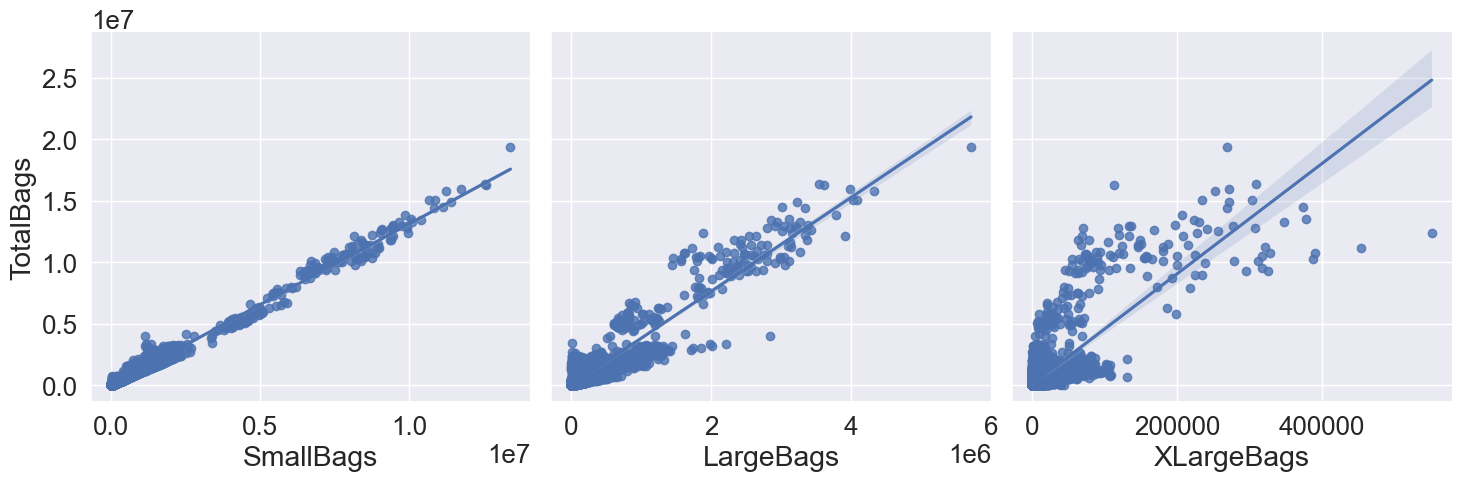

In [49]:
sns.pairplot(data, x_vars=['SmallBags', 'LargeBags', 'XLargeBags'], y_vars='TotalBags', size=5, aspect=1, kind='reg')

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

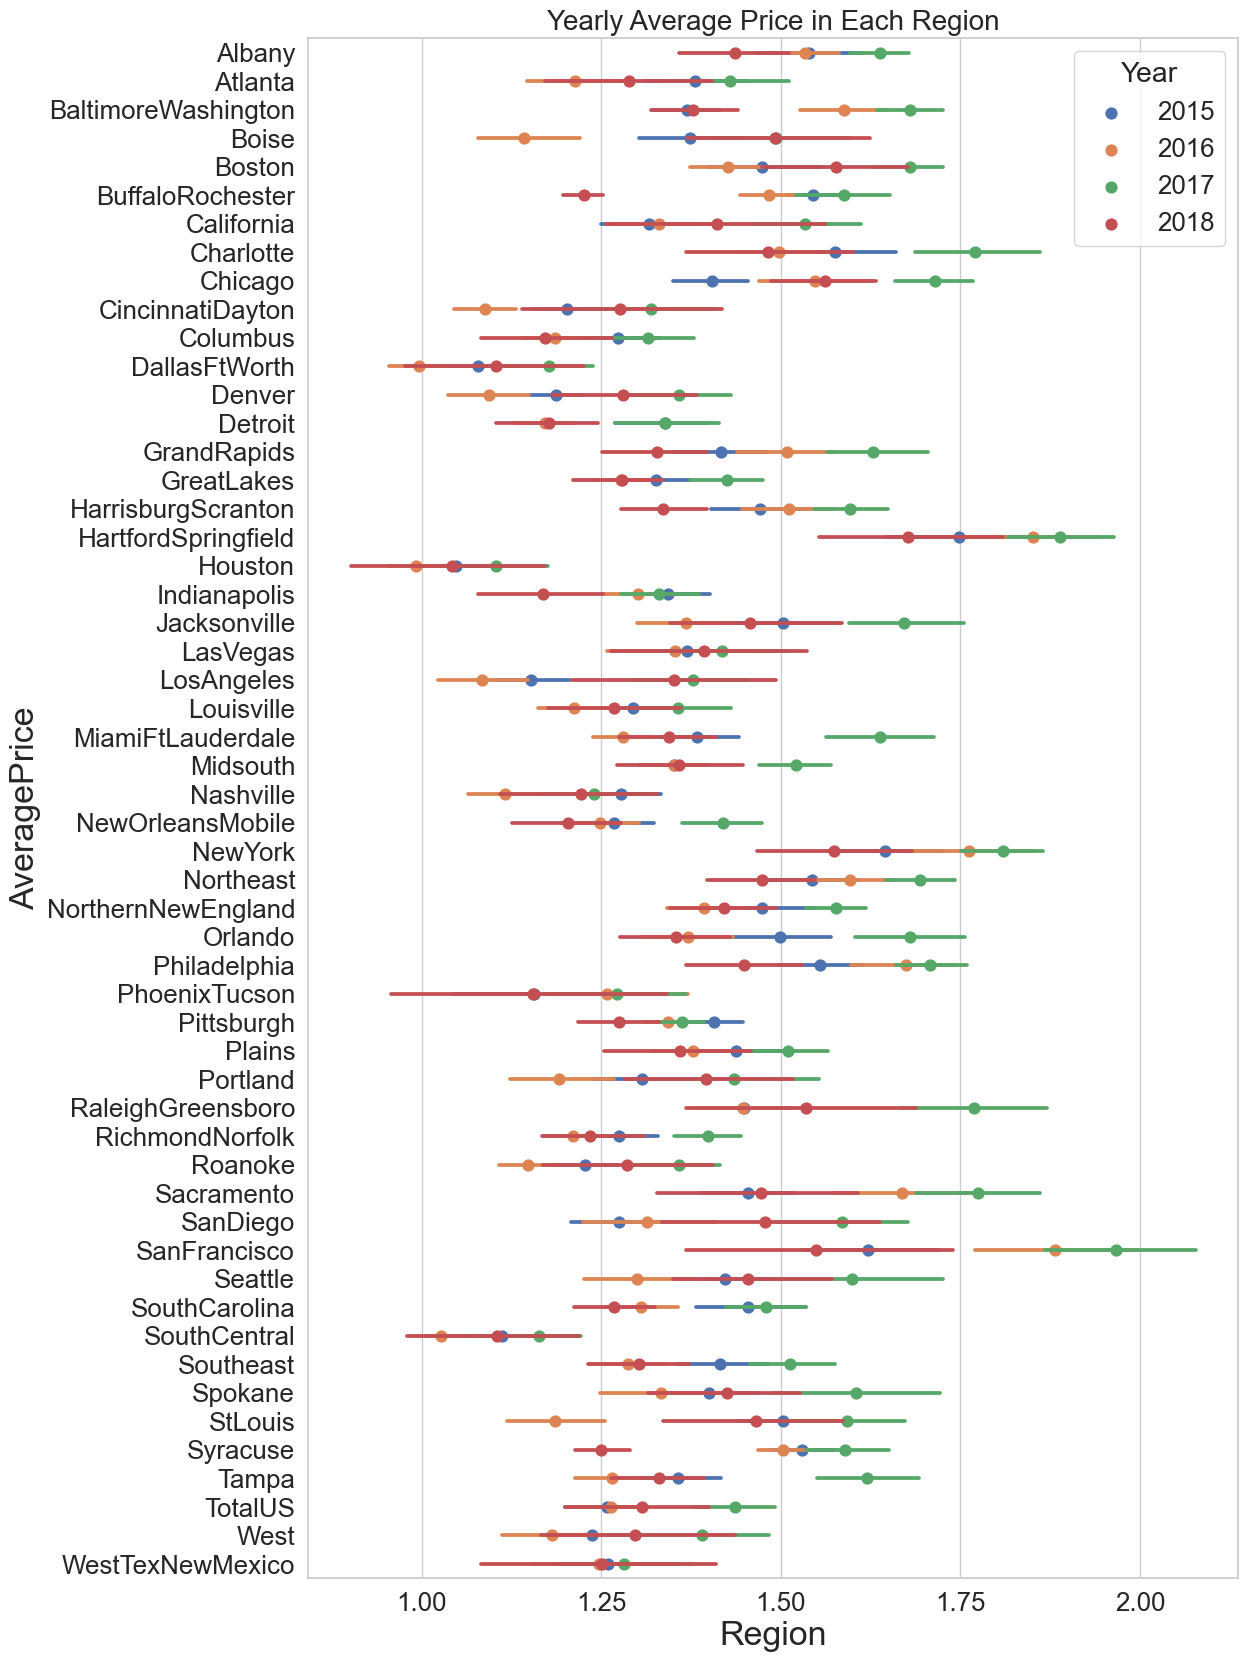

In [50]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='Region',data=data, hue='Year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

Text(0.5, 1.0, 'Type Average Price in Each Region')

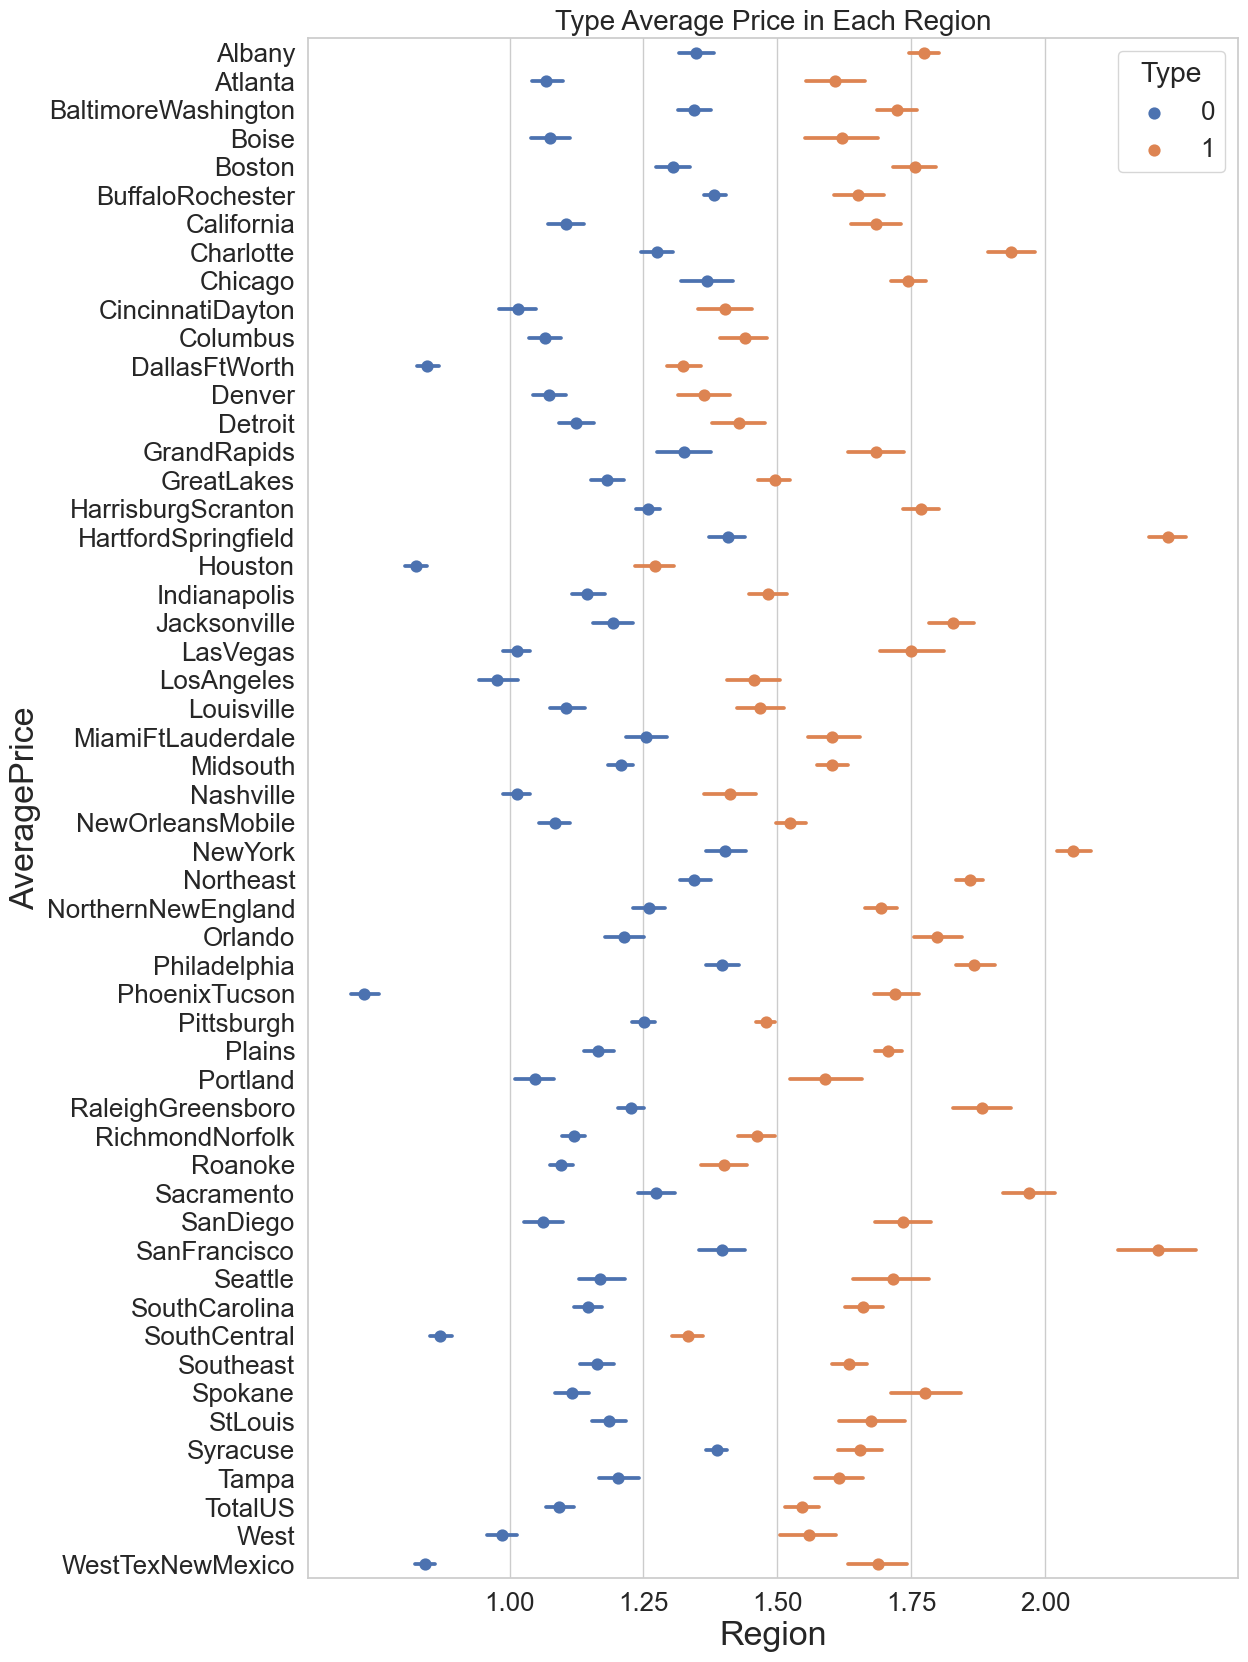

In [51]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='Region', data=data, hue='Type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

In [52]:
X=data[['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags']] #feature columns
y=data.Type #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 7)
Y Train Shape  (14599,)
X Test Shape  (3650, 7)
Y Test Shape  (3650,)


Accuracy score for Logistic Regression test data is: 0.9402739726027397
----------------------------------------------------------------------------------------
Confusion matrix for logistic regression model
              Predicted organic  Predicted Conventional
organic                    1664                     184
Conventional                 34                    1768
----------------------------------------------------------------------------------------


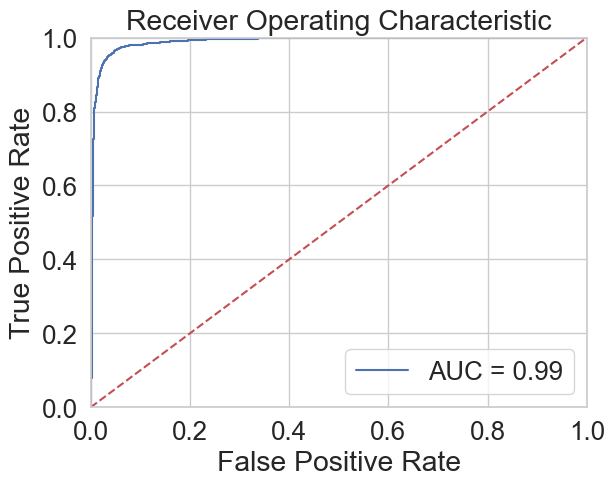

In [53]:
#Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)  

#Acuuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy score for test data using Random Forest : 0.996986301369863
----------------------------------------------------------------------------------------
Confusion matrix for Random forest model
              Predicted organic  Predicted Conventional
organic                    1841                       7
Conventional                  4                    1798
----------------------------------------------------------------------------------------


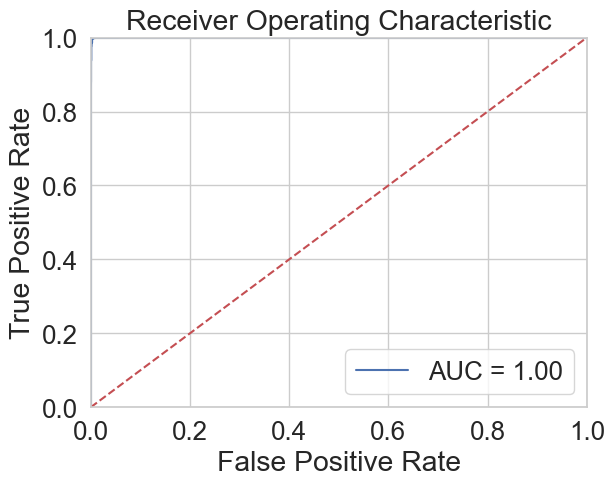

In [54]:
#Randomforest classifier
rfclass = RandomForestClassifier(random_state = 0)
rfclass.fit(X_train, y_train)

y_pred_train = rfclass.predict(X_train)
y_pred_test = rfclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = rfclass.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
data.drop(['Date', 'TotalVolume', 'TotalBags', 'Region', 'Year'], axis = 1,inplace = True)

In [56]:
data.columns

Index(['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags',
       'XLargeBags', 'Type'],
      dtype='object')

In [57]:
scaler = StandardScaler().fit(data)
data_avocado_scaler = scaler.transform(data)
data_avocado = pd.DataFrame(data_avocado_scaler)
data_avocado.columns = ['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
data_avocado.head()

AveragePrice     Small     Large    XLarge  SmallBags  LargeBags  \
0     -0.188689 -0.230816 -0.199902 -0.212091  -0.232647  -0.222352   
1     -0.139020 -0.231103 -0.208054 -0.211997  -0.231568  -0.222335   
2     -1.182069 -0.231007 -0.154478 -0.211325  -0.233399  -0.222311   
3     -0.809551 -0.230741 -0.185350 -0.211864  -0.236568  -0.222186   
4     -0.312861 -0.230891 -0.208719 -0.211834  -0.236154  -0.221924   

   XLargeBags      Type  
0    -0.17558 -0.999836  
1    -0.17558 -0.999836  
2    -0.17558 -0.999836  
3    -0.17558 -0.999836  
4    -0.17558 -0.999836

In [58]:
feature_cols = ['Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
X = data_avocado[feature_cols]

In [59]:
y = data_avocado.AveragePrice

In [60]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [61]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 7)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 7)
y_test shape:  (3650,)


In [62]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [63]:
linreg = linear_reg(X,y)

In [64]:
linreg.score(X,y)

0.3980206520577072

In [65]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: -0.0025057119702502732
Coefficients: [-0.31332629  0.32039105 -0.12354322  0.06163263 -0.07300029  0.07633143
  0.60580356]


In [66]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [67]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.0025057119702502732
Small -0.3133262880926919
Large 0.3203910517486833
XLarge -0.12354321842178159
SmallBags 0.061632627690363206
LargeBags -0.07300028791378115
XLargeBags 0.07633142768206083
Type 0.6058035608004637


In [68]:
y_pred_train = linreg.predict(X_train)

In [69]:
y_pred_test = linreg.predict(X_test)

In [70]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.5940526287383294
MAE for test set is 0.5974131265484528
----------------------------------------------------------------------------------------
MSE for training set is 0.6023479204673671
MSE for test set is 0.6005051588207693
----------------------------------------------------------------------------------------
RMSE for training set is 0.7761107655917209
RMSE for test set is 0.7749226792530783


In [71]:
print("Model Evaluation for Linear Regression Model")

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Linear Regression Model
----------------------------------------------------------------------------------------
r_squared for train data  0.397386293900034  and adjusted_r_squared for train data 0.3970971913064695
----------------------------------------------------------------------------------------
r_squared for test data  0.4005468712569106  and adjusted_r_squared for test data 0.39939470983428516


In [75]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test) 

In [76]:
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Random Forest Regressor 
RMSE for training set is 0.17928509580328214  and RMSE for test set is 0.45890247854386396
----------------------------------------------------------------------------------------
r_squared for train data  0.9678426712804894  and adjusted_r_squared for train data 0.9678272438731125
----------------------------------------------------------------------------------------
r_squared for test data  0.7897774521935382  and adjusted_r_squared for test data 0.7893734000698026


In [104]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [106]:
df = pd.read_csv(r'C:\Users\ARNAB\Downloads\ibm-hr-analytics-employee-attrition-performance.zip')
df.shape

(1470, 35)

In [107]:
df.sample(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
964    34        No      Travel_Rarely        507                   Sales   
265    29        No      Travel_Rarely       1210                   Sales   
605    38        No  Travel_Frequently        471  Research & Development   
263    46        No      Travel_Rarely        488                   Sales   
1361   26        No  Travel_Frequently       1096  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
964                 15          2           Medical              1   
265                  2          3           Medical              1   
605                 12          3     Life Sciences              1   
263                  2          3  Technical Degree              1   
1361                 6          3             Other              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
964             1356                        3  Female          66   
265              366                        1    Male          78   
605              837                        1    Male          45   
263              363                        3  Female          75   
1361            1918                        3    Male          61   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
964                3         2            Sales Executive                1   
265                2         2            Sales Executive                2   
605                2         2  Healthcare Representative                1   
263                1         4                    Manager                2   
1361               4         1      Laboratory Technician                4   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
964         Single           6125        23553                   1      Y   
265        Married           6644         3687                   2      Y   
605       Divorced           6288         4284                   2      Y   
263        Married          16872        14977                   3      Y   
1361       Married           2544         7102                   0      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
964        No                 12                  3                         4   
265        No                 19                  3                         2   
605        No                 15                  3                         3   
263       Yes                 12                  3                         2   
1361       No                 18                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
964              80                 0                 10   
265              80                 2                 10   
605              80                 1                 13   
263              80                 1                 28   
1361             80                 1                  8   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
964                       6                4              10   
265                       2                3               0   
605                       3                2               4   
263                       2                2               7   
1361                      3                3               7   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
964                    8                        9                     6  
265                    0                        0                     0  
605                    3                        1                     2  
263                    7                        7                     7  
1361                   7                        7                     7

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [109]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

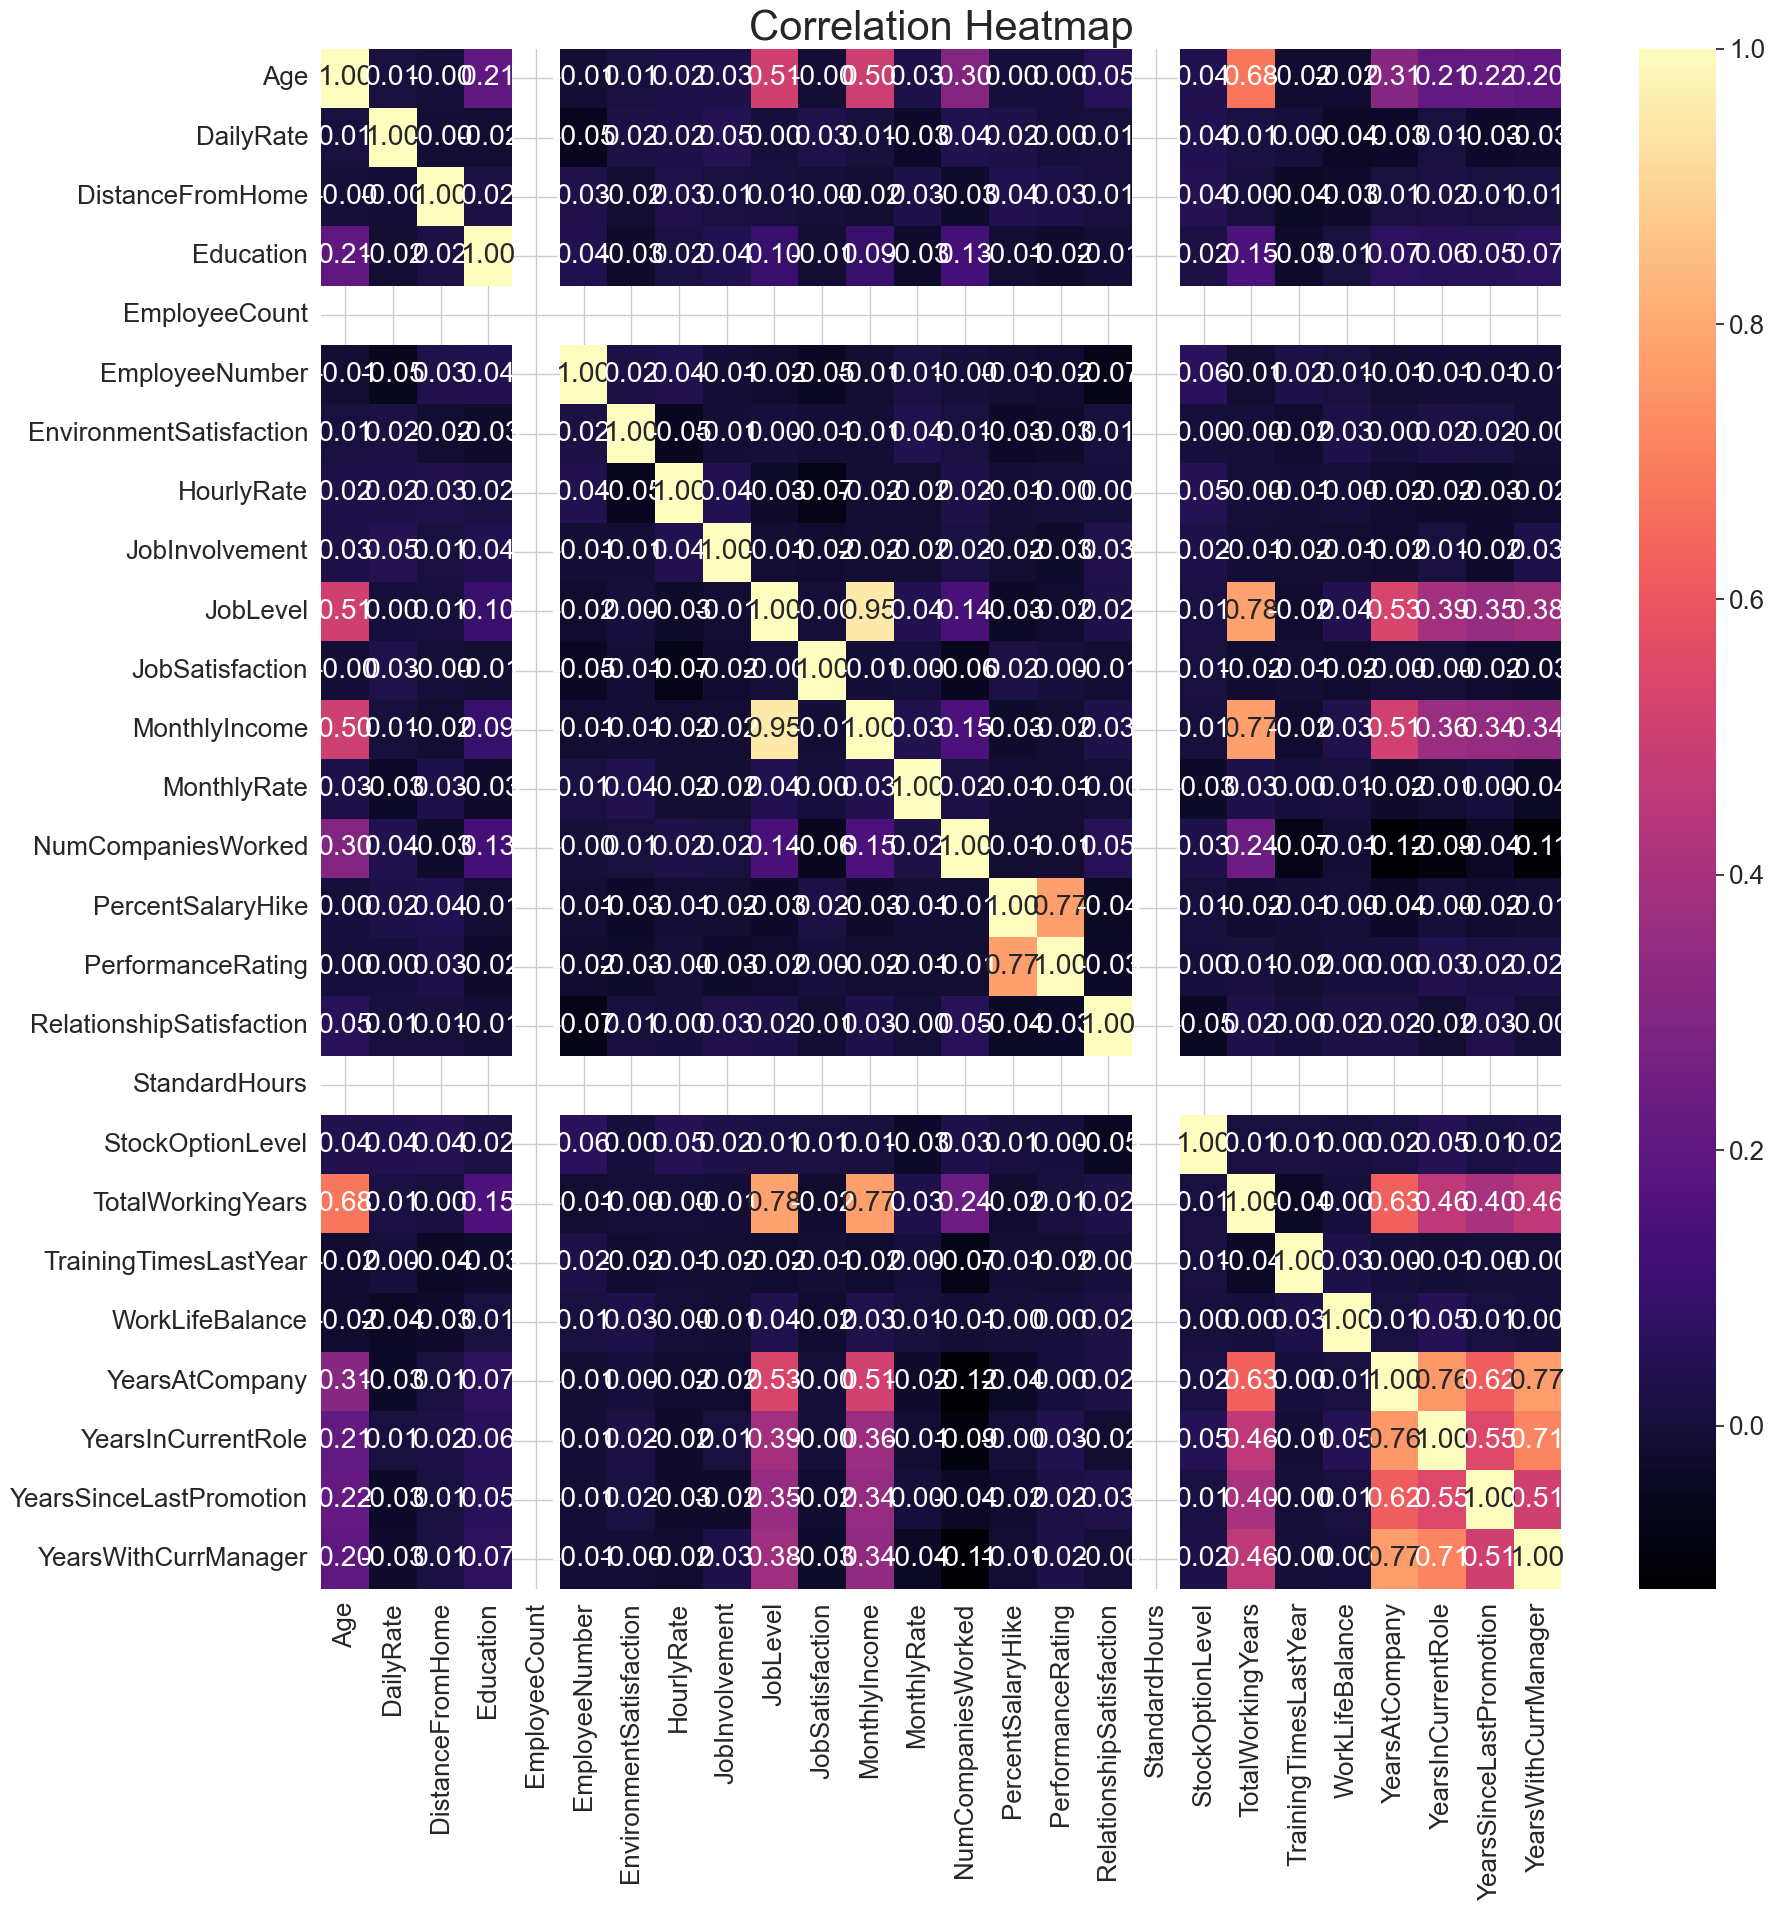

In [110]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap', fontsize=30)
plt.show()

In [112]:
categorical_cols = [feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical_cols].sample(5)

Attrition     BusinessTravel              Department   EducationField  \
1088        No      Travel_Rarely  Research & Development          Medical   
139         No      Travel_Rarely         Human Resources  Human Resources   
222         No  Travel_Frequently  Research & Development            Other   
27          No      Travel_Rarely                   Sales        Marketing   
1021       Yes      Travel_Rarely                   Sales    Life Sciences   

     Gender                JobRole MaritalStatus Over18 OverTime  
1088   Male  Laboratory Technician       Married      Y       No  
139    Male        Human Resources       Married      Y      Yes  
222    Male      Research Director      Divorced      Y      Yes  
27     Male        Sales Executive       Married      Y       No  
1021   Male   Sales Representative       Married      Y       No

In [113]:
numerical_cols = [feature for feature in df.columns if df[feature].dtypes!='object']
df[numerical_cols].sample(5)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
845    40        902                26          2              1   
836    29        408                23          1              1   
102    20        871                 6          3              1   
1242   40        611                 7          4              1   
632    42       1271                 2          1              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
845             1180                        3          92               2   
836             1165                        4          45               2   
102              137                        4          66               2   
1242            1740                        2          88               3   
632              875                        2          35               3   

      JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
845          2                4           4422        21203   
836          3                1           7336        11162   
102          1                4           2926        19783   
1242         5                2          19833         4349   
632          1                4           2515         9068   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
845                    3                 13                  3   
836                    1                 13                  3   
102                    1                 18                  3   
1242                   1                 14                  3   
632                    5                 14                  3   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
845                          4             80                 1   
836                          1             80                 1   
102                          2             80                 0   
1242                         2             80                 0   
632                          4             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
845                  16                      3                1   
836                  11                      3                1   
102                   1                      5                3   
1242                 21                      3                2   
632                   8                      2                3   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
845                1                   1                        0   
836               11                   8                        3   
102                1                   0                        1   
1242              21                   8                       12   
632                2                   1                        2   

      YearsWithCurrManager  
845                      0  
836                     10  
102                      0  
1242                     8  
632                      2

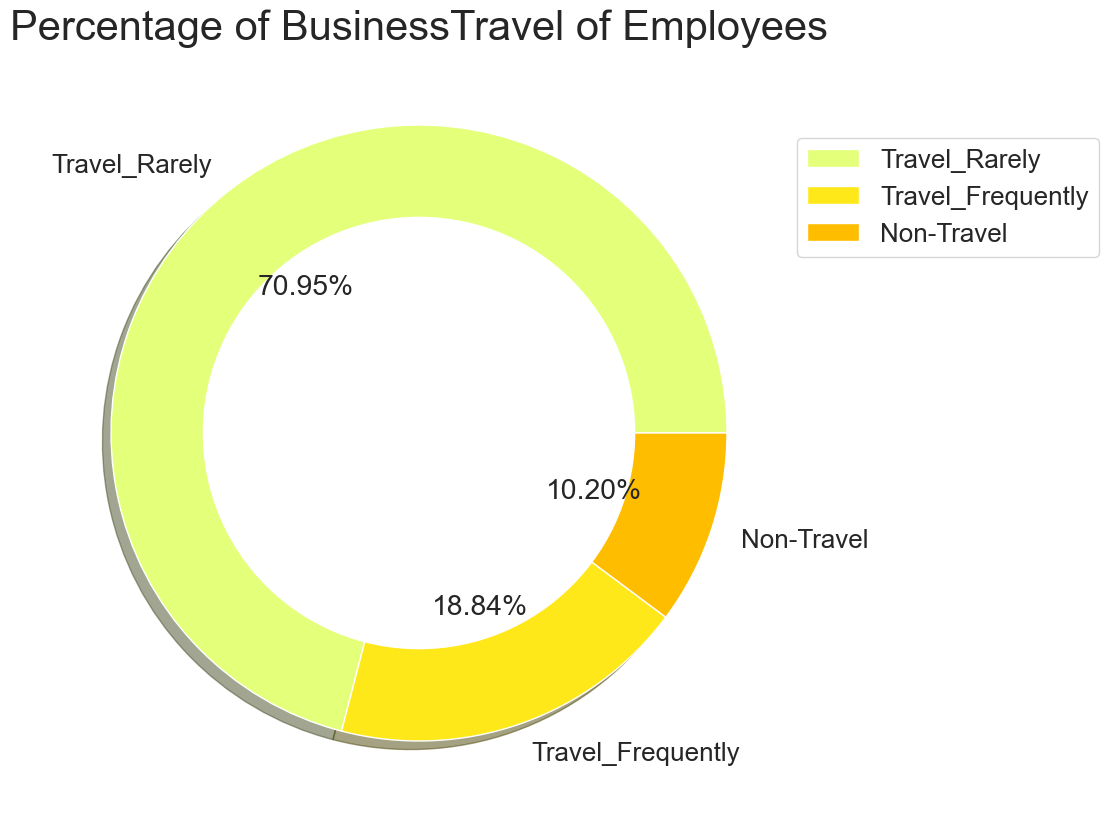

In [114]:
size = df['BusinessTravel'].value_counts()
labels = df['BusinessTravel'].unique()
colors = plt.cm.Wistia(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of BusinessTravel of Employees', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

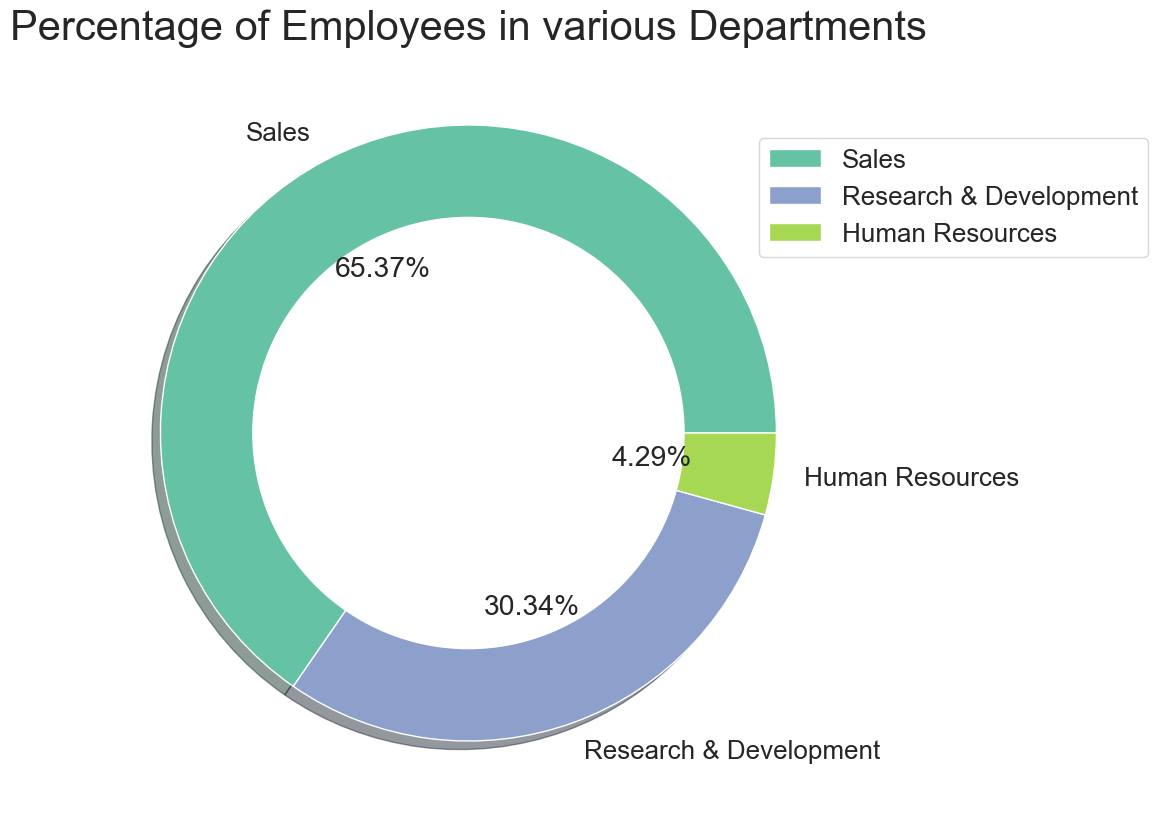

In [115]:
size = df['Department'].value_counts()
labels = df['Department'].unique()
colors = plt.cm.Set2(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Employees in various Departments', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

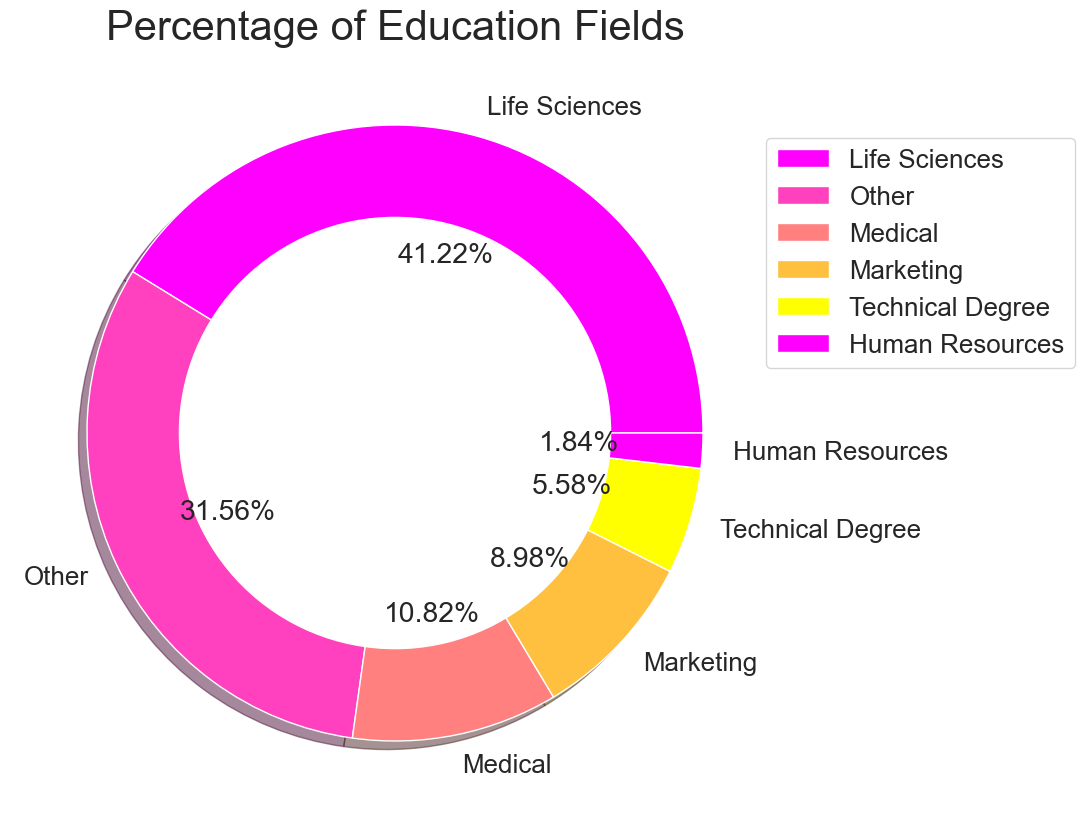

In [116]:
size = df['EducationField'].value_counts()
labels = df['EducationField'].unique()
colors = plt.cm.spring(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Education Fields', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

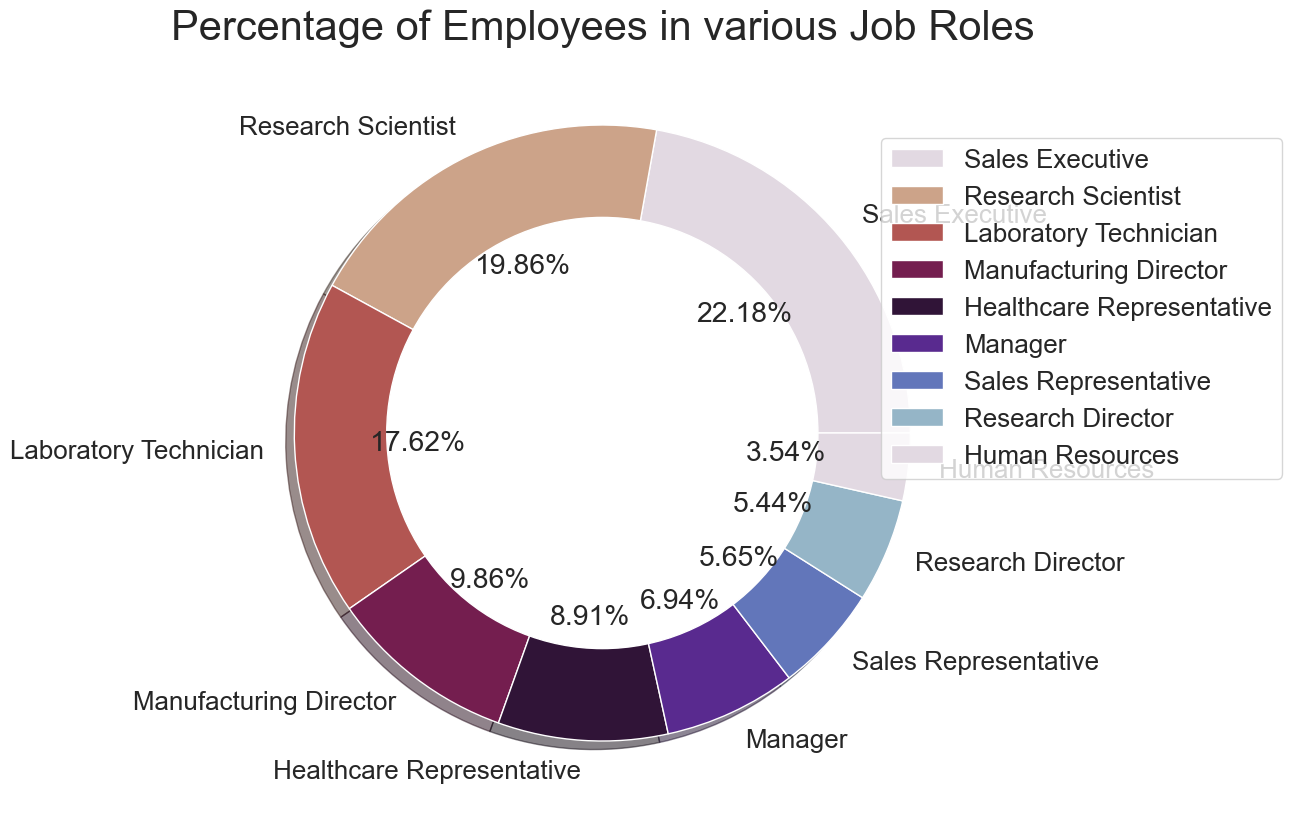

In [117]:
size = df['JobRole'].value_counts()
labels = df['JobRole'].unique()
colors = plt.cm.twilight_r(np.linspace(0,1,9))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Employees in various Job Roles', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

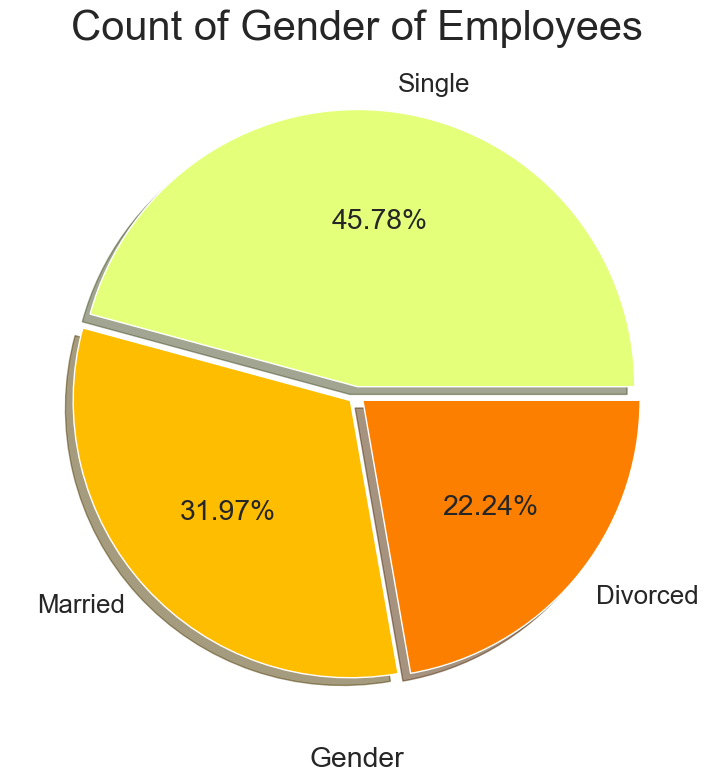

In [119]:
size=df['MaritalStatus'].value_counts()
labels=df['MaritalStatus'].unique()
colors=plt.cm.Wistia(np.linspace(0,1,3))
explode = [0.03, 0.03, 0.03]

plt.figure(figsize=(9,9))
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=True)
plt.title('Count of Gender of Employees', fontsize=30)
plt.xlabel('Gender')
plt.show()

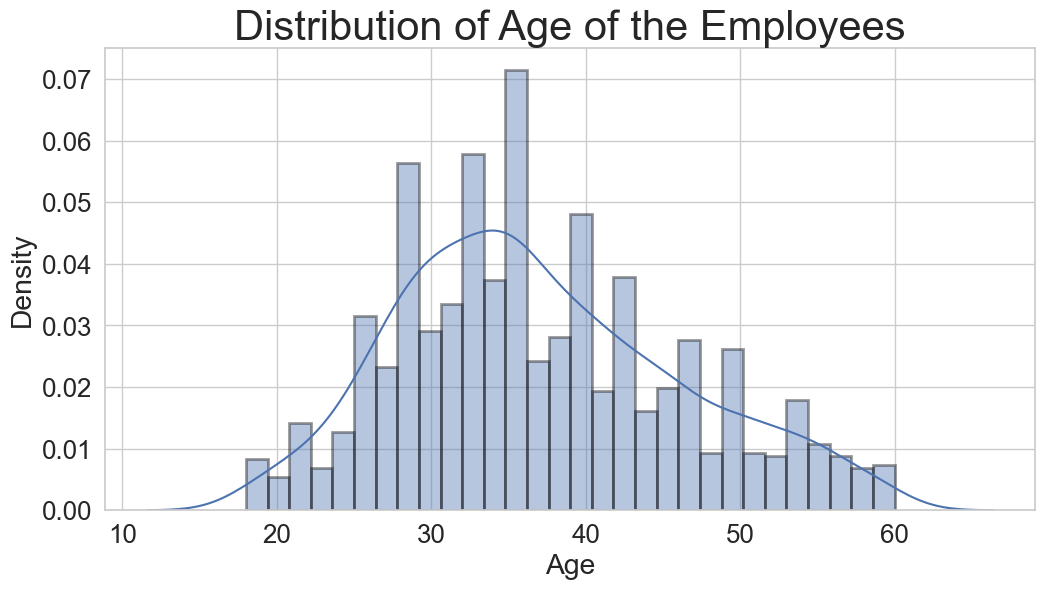

In [120]:
plt.figure(figsize=(12,6))
sns.distplot(df['Age'], bins=30, hist_kws=dict(edgecolor='black', linewidth=2))
plt.title('Distribution of Age of the Employees', fontsize=30)
plt.xlabel('Age')
plt.show()

<Figure size 1900x600 with 0 Axes>

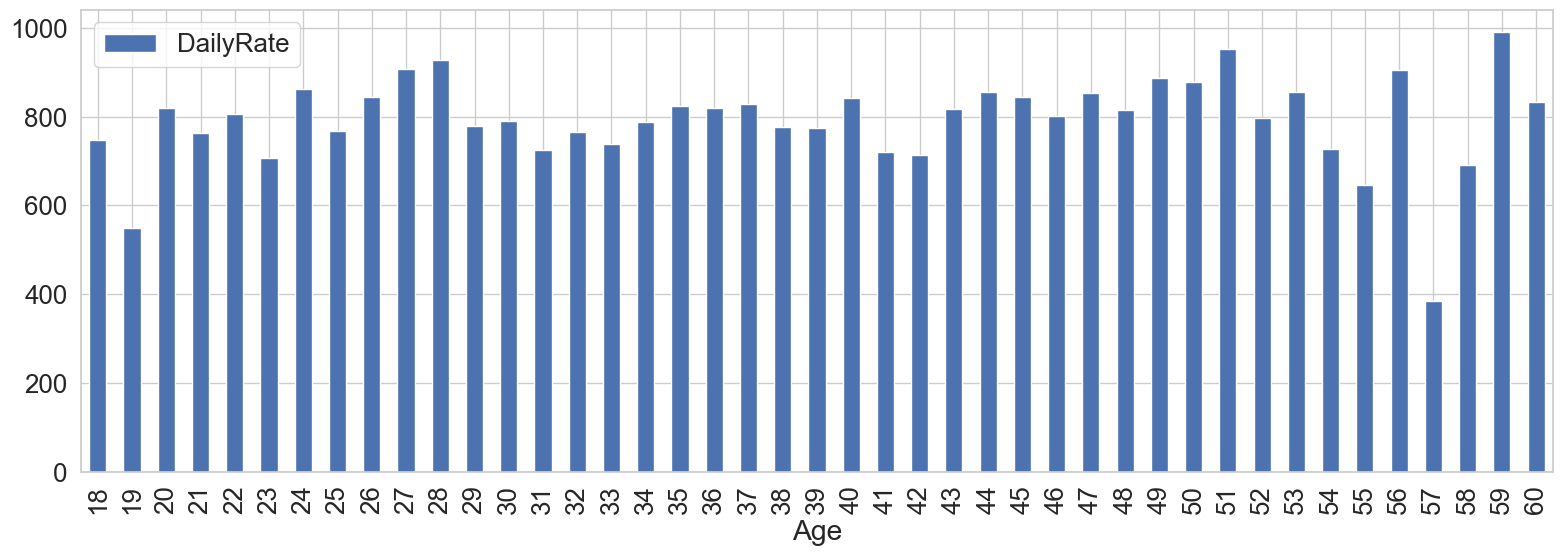

In [123]:
plt.figure(figsize=(19,6))
x = df[['Age', 'DailyRate']].groupby('Age').mean()
x = pd.DataFrame(x)
x.sort_values(by = 'Age').plot(kind='bar', figsize=(19,6));

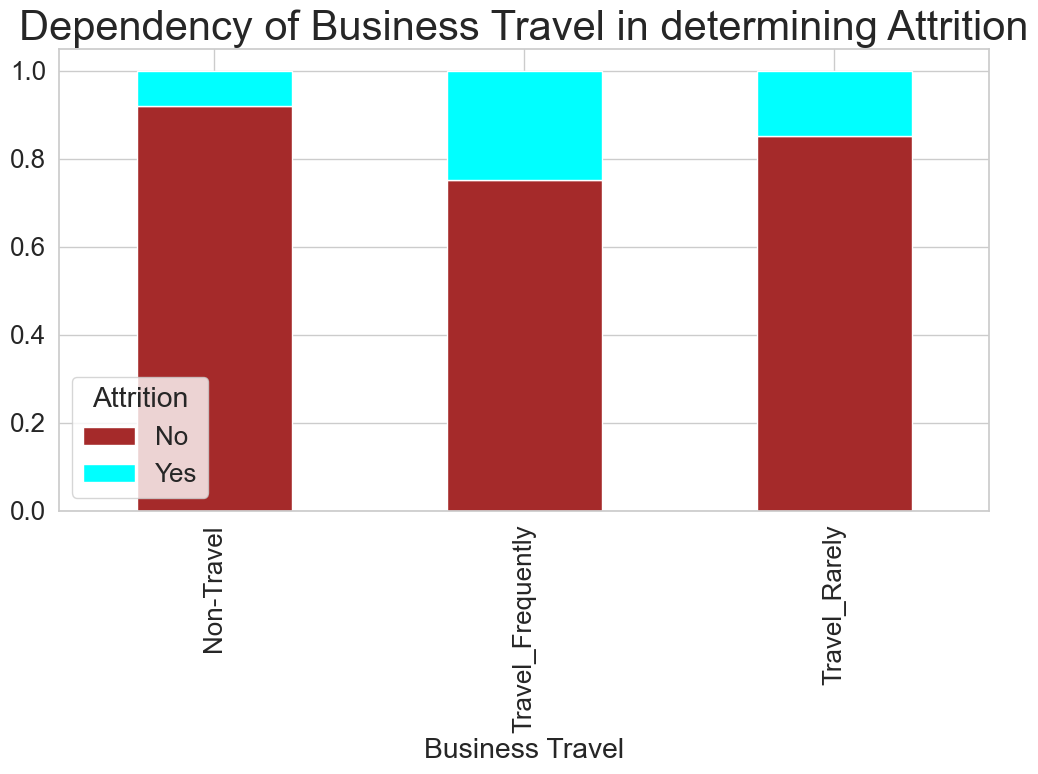

In [124]:
data=pd.crosstab(df['BusinessTravel'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'cyan'], 
                                                figsize=(12,6))
plt.title('Dependency of Business Travel in determining Attrition', fontsize=30)
plt.xlabel('Business Travel')
plt.show()

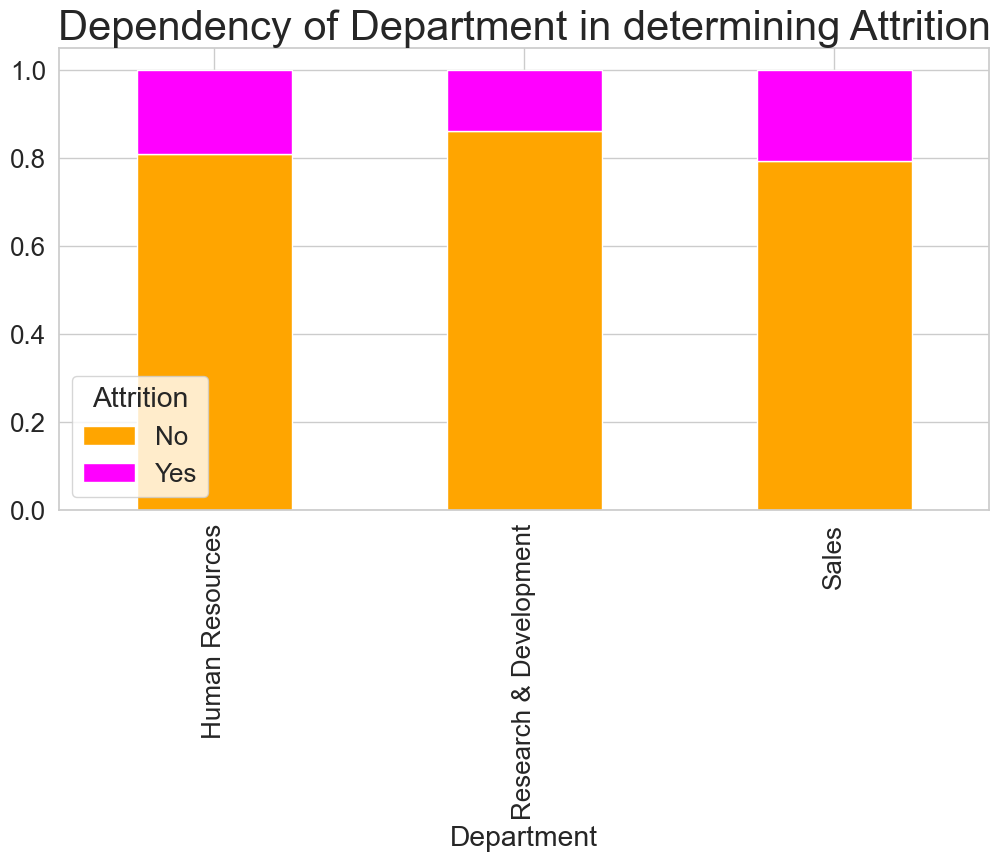

In [125]:
data=pd.crosstab(df['Department'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'magenta'], 
                                                figsize=(12,6))
plt.title('Dependency of Department in determining Attrition', fontsize=30)
plt.xlabel('Department')
plt.show()

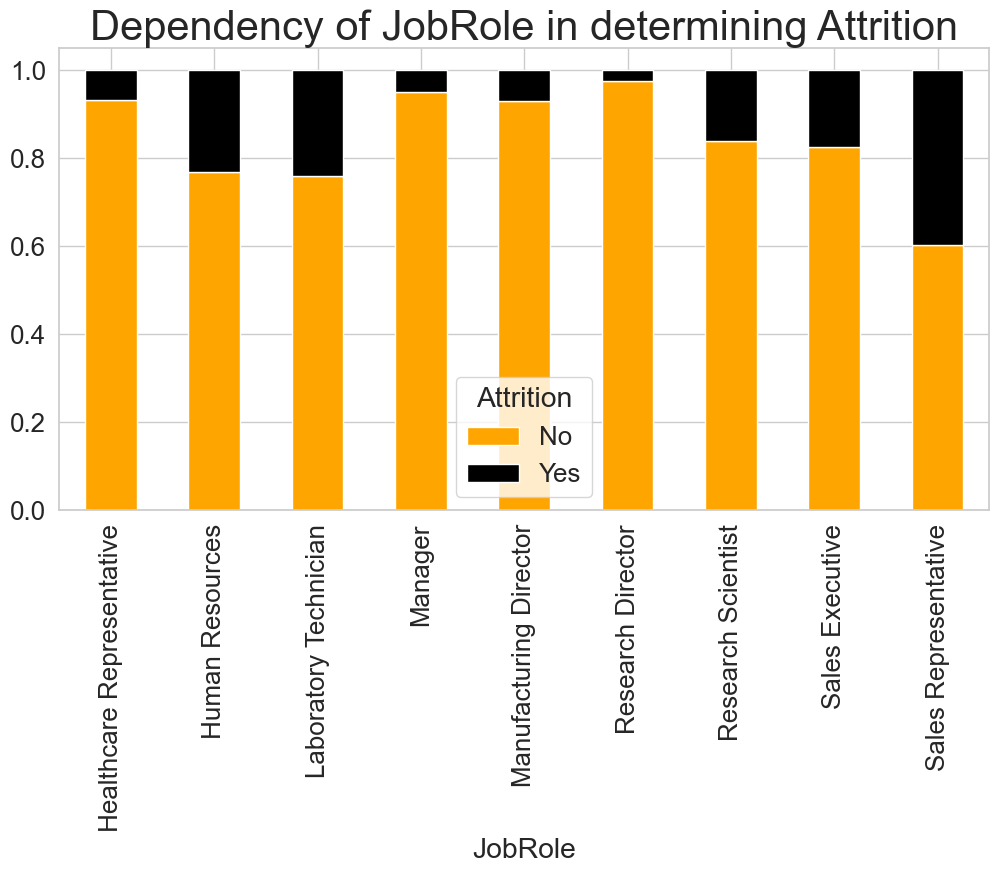

In [126]:
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of JobRole in determining Attrition', fontsize=30)
plt.xlabel('JobRole')
plt.show()

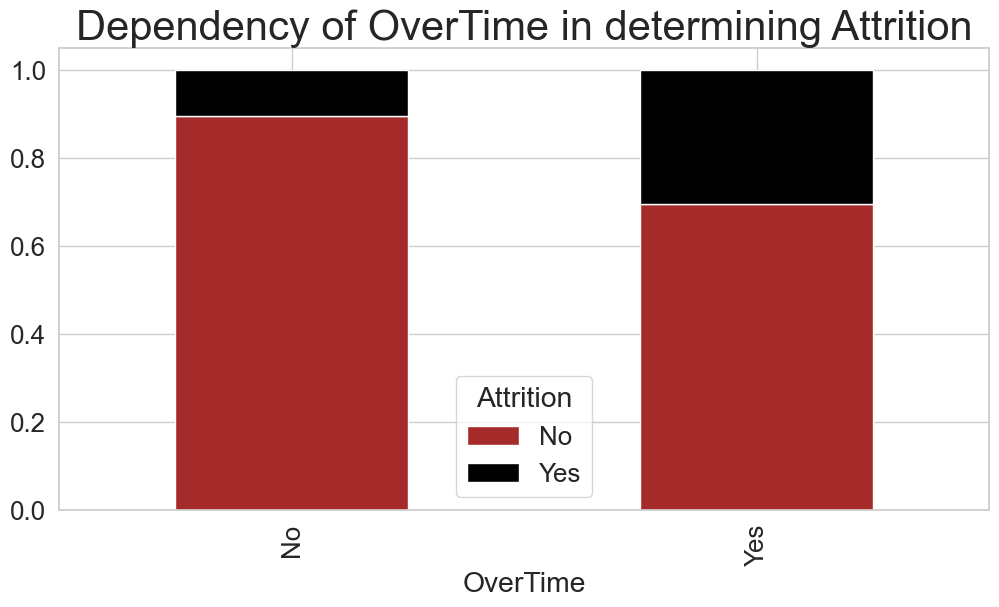

In [127]:
data=pd.crosstab(df['OverTime'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of OverTime in determining Attrition', fontsize=30)
plt.xlabel('OverTime')
plt.show()

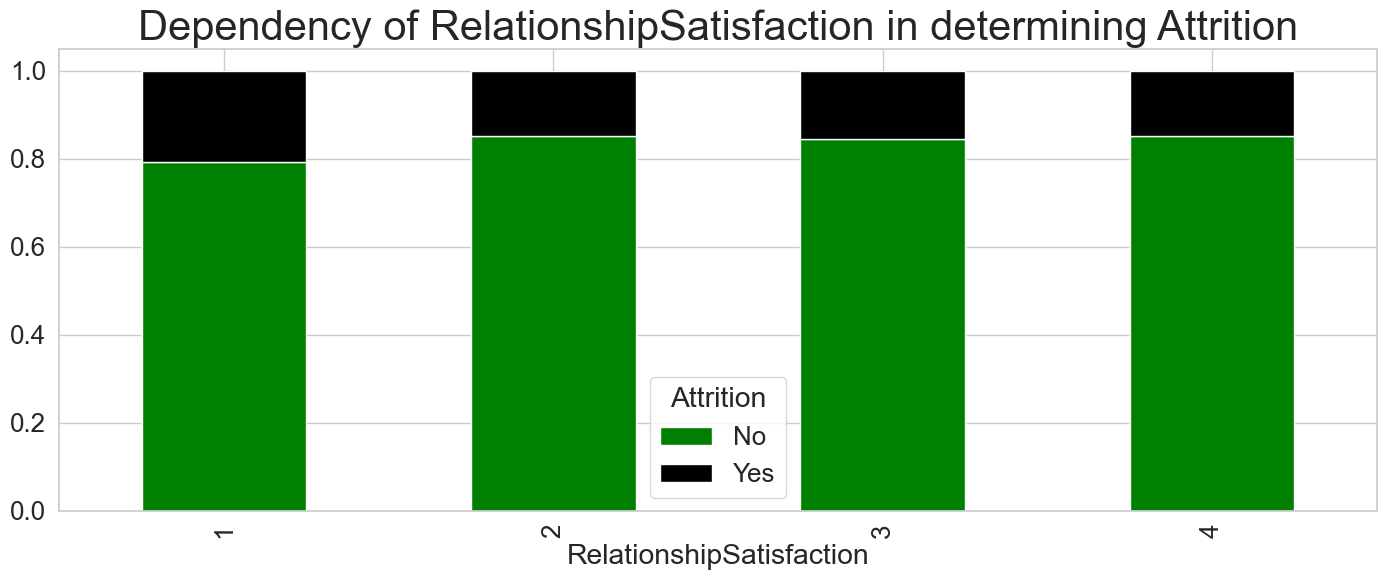

In [129]:
data=pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['green', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction')
plt.show()

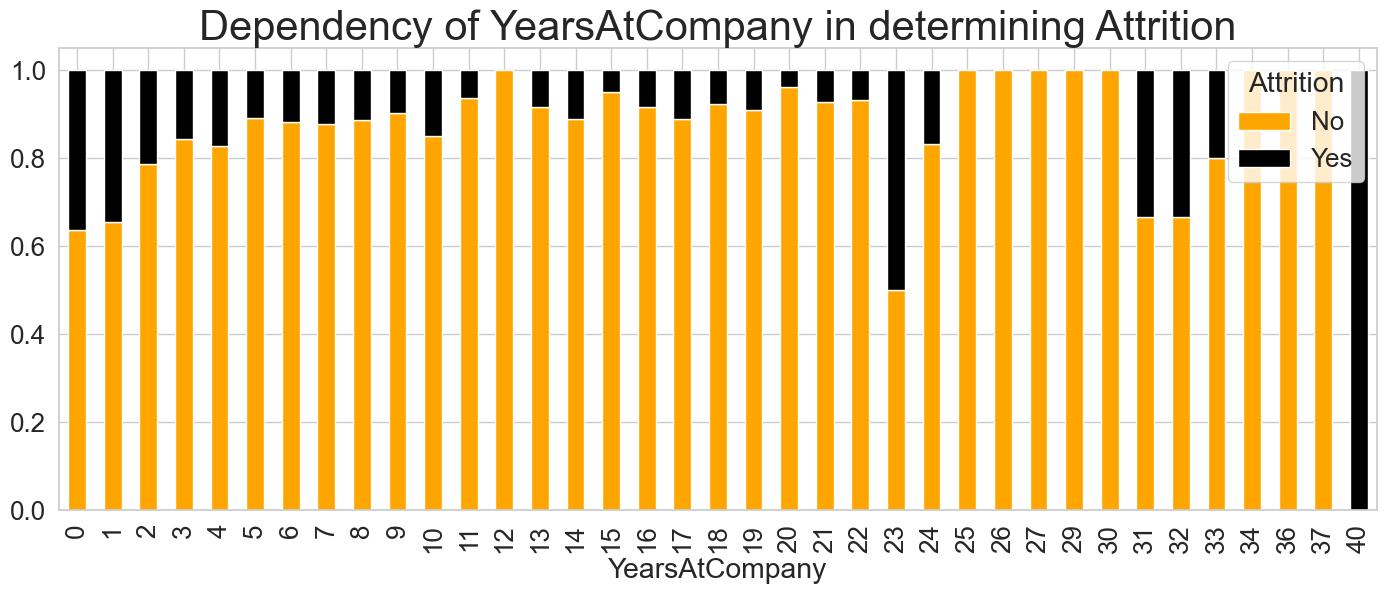

In [131]:
data=pd.crosstab(df['YearsAtCompany'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()

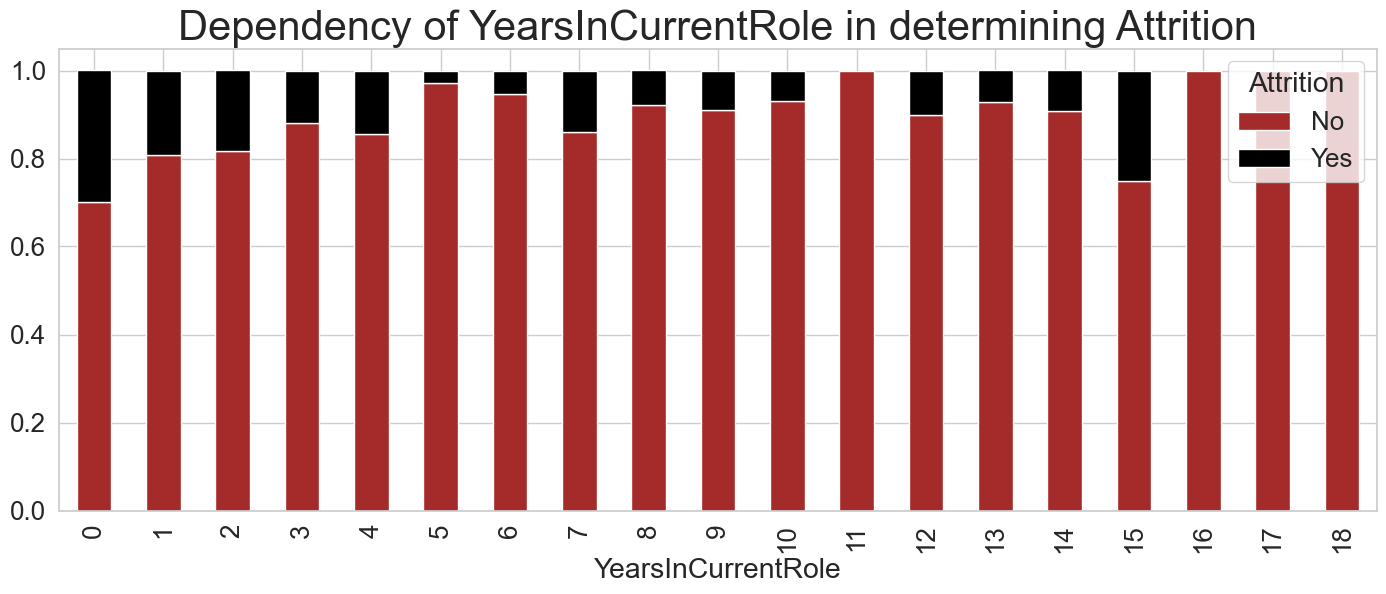

In [133]:
data=pd.crosstab(df['YearsInCurrentRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
plt.xlabel('YearsInCurrentRole')
plt.show()

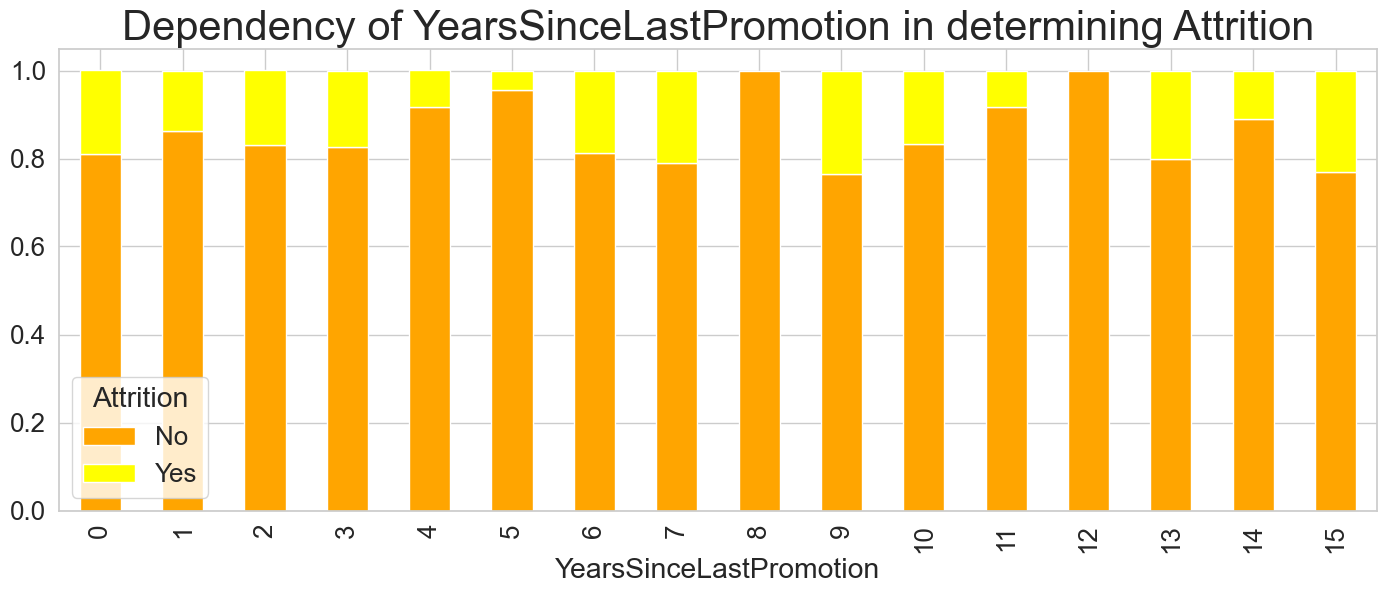

In [135]:
data=pd.crosstab(df['YearsSinceLastPromotion'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'yellow'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()

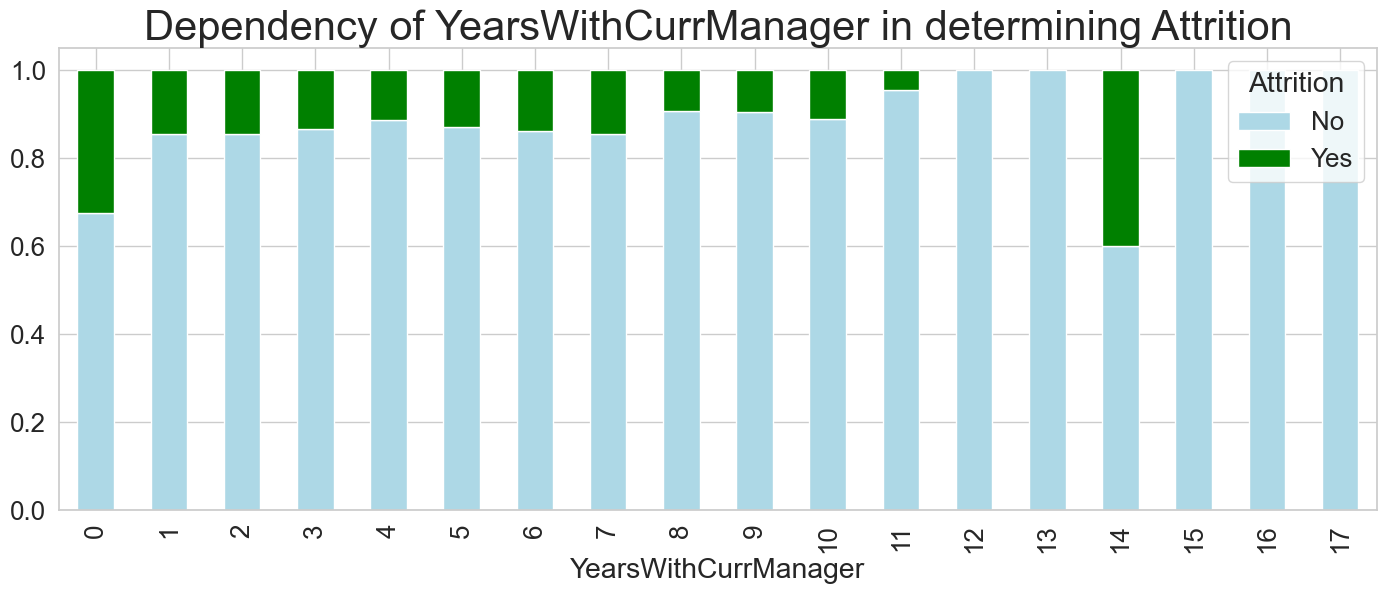

In [137]:
data=pd.crosstab(df['YearsWithCurrManager'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'green'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()